<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Maxime Breden</center>
<br>
<center><i>Based on Notebooks created by Aline Lefebvre-Lepot</i></center>

# Polynomial approximation of functions of one variable

&nbsp;

<table>
        <tr>
            <td><img src="./figures/Interpolation.png" alt="Interpolation" style="height: 300px;"/></td>
            <td><img src="./figures/LeastSquares.png" alt="LeastSquares" style="height: 290px;"/></td>
        </tr>
</table>

&nbsp;

<div markdown=1 class=Abstract> In this chapter we consider the problem of approximating a data set or a function using polynomials. First, we present and analyse interpolation methods: Lagrange interpolation and piecewise polynomial approximations. Then, we describe the least squares approximation, providing a "best fit" polynomial. These methods are used to solve three problems.

<div markdown=1 class=Abstract> The symbol [$\star$] indicates supplementary material (most of the time proofs) that is optional to understand. This material is provided for the sake of completeness and for interested readers.

## Table of contents

- [Introduction](#intro)
- [Lagrange interpolation of functions](#Lagrange)
- [Piecewise Interpolation](#PiecewiseInterp)
- [Least square approximation](#LeastSquare)

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="intro"></a>
## Introduction

Suppose that a data set $(x_k,y_k)_{k=0..n}$ is given and one wants to model it using a simple function. Since one of the most simple and easy to manipulate set of functions mapping $\mathbb{R}$ into itself is the set of polynomials, one searches for a polynomial $P$ representing the data.

More precisely, there are at least two ways of looking for such a polynomial:
- using interpolation methods: find $P$ such that for all $k=0\ldots n$, $P(x_k)=y_k$
- using approximation methods: find $P$ such that for all $k=0\ldots n$, $P(x_k)$ is "close to" $y_k$

We give below three examples of situations where polynomial approximation can be used.


### Case study 1: a model to estimate the world population

The world population has been estimated for several years: the following data is available (source http://www.worldometers.info/world-population/world-population-by-year/)

| Year | Pop. |
| --- | --- |
| 1900 | 1,600,000,000 | 
| 1927 | 2,000,000,000 | 
| 1955 | 2,772,242,535 | 
| 1960 | 3,033,212,527 | 



Suppose one wants to 
- Determine the population in 1951
- Determine the approximate time at which the number of living humans went past the $2.2$ Billions mark

To do so, one can model the evolution of the population versus time as a polynomial and use this polynomial to approximate the answer to these two questions.
 

### Case study 2: approximation of $\pi$

Suppose you want to approximate the value of $\pi$. Several methods can be used to do that. One possibility is to write $\pi$ as an integral and then to approximate the function to be integrated by simpler functions such as polynomials, which are easier to integrate. 

One formula which expresses $\pi$ as an integral is the following

$$\pi=4\int_{0}^{1}\frac{1}{1+x^2}dx.$$

Introducing 

$$ d_{atan}:
\left\{\begin{array}{l}
                           \mathbb{R} &\rightarrow &\mathbb{R} \\
                            x &\rightarrow &\frac{1}{1+x^2}
                            \end{array}\right.
$$

so that 

$$\pi=4\int_{0}^{1}d_{atan}(x)dx, $$

we want to approximate $d_{atan}$ using polynomials, and then integrate this approximation to obtain an approximation of $\pi$.

### Case study 3: parameter estimation for the Capital Asset Pricing Model (CAPM)

Consider a portfolio of assets: think for example of the CAC40 in France (benchmark French stock market index) or of the NASDAC or Dow Jones in USA. In this portfolio, consider a specific asset (i.e. one of the companies in the portfolio). 


The return $R_k$ of the asset at day $k$ is a measure of what you gain (or lose) that day if you possess this asset. Similarly, let us denote by $R^m_k$ the market portfolio return on day $k$, which again is a measure of what you gain (or lose) that day if you possess the whole portfolio.

The Capital Asset Pricing Model (CAPM) provides a theoretical relation to estimate returns on a specific asset and the whole market portfolio through the equation

$$
R_k = \alpha + \beta \, R^m_k.
$$

The parameter $\beta$ represents the systematic risk (associated to the market): when the market portfolio return moves by 1 the asset's return variation is $\beta$. The higher $\beta$, the more the corresponding asset varies when the market varies, that is, the more risky the asset. 

The parameter $\alpha$ represents the risk associated to the asset, that is the return of the asset if the market does not change.


**Parameter estimation:**
Being given the values of $(R^m_k)_{k=1..n}$ and $(R_k)_{k=1..n}$ for $n$ days, one wants to estimate the parameters $\alpha$ and $\beta$ in order to model the behavior of the corresponding asset, understand how risky it is and estimate its future trend.

To do so, one has to approximate the data by a polynomial of degree 1: $R_k = Q(R_k^m)$ where $Q(x)=\alpha + \beta\,x$. The question is to find "good" values $\alpha^*$ and $\beta^*$ for the parameters $\alpha$ and $\beta$ so that the approximated affine model is close to the data.

Once $\alpha^*$ and $\beta^*$ are computed, one also wishes to know how confident one can be when using these values to model the behavior of the asset.


<a id="Lagrange"></a>
## Lagrange interpolation

<img src="figures/Lagrange.jpg" alt="Lagrange" style="width: 150px;" />

>**Joseph-Louis Lagrange (1736 - 1813).**
> Joseph-Louis Lagrange is an Italian (who became French by the end of his life) mathematician and astronomer. He made significant contribution in analysis, number theory and both classical and celestial mechanics. He is one of the creators of the calculus of variations, which is a field of mathematical analysis that uses variations, which are small changes in functions and functionals, to find maxima and minima of functionals. He is best known for his contributions to mechanics (initiating a branch now called Lagragian mechanics), presenting the "mechanical principles" as a result of calculus of variations. Concerning calculus, he contributed to discover the importance of Taylor series (sometimes called Taylor-Lagrange series) and published in 1795 an interpolation method based on polynomials now called "Lagrange polynomials". Note that this interpolation method was already suggested in works of Edward Waring in 1779 and was a consequence of a formula published in 1783 by Leonhard Euler.

### Existence and uniqueness of the Lagrange interpolation polynomial

<div mardown=1, class='Def'>
Suppose you have a data set of $n+1$ data points $(x_k,y_k)_{0\leq k\leq n}$, where the $x_k$ are pairwise disjoint real numbers, and the $y_k$ can be any real numbers.
    
- A polynomial $P$ is said to **interpolate** the data if $P(x_k)=y_k$ for all $k=0,\ldots,n$. $P$ is then called an **interpolation polynomial** (associated to the data $(x_k,y_k)_{0\leq k\leq n}$).
    
- In this context, the $x_k$ are called **interpolation points**, or **interpolation nodes**. In the sequel, when we talk about interpolation points or nodes, we always assume that they are pairwise disjoint.

<div  markdown=1 class="Ex">

- **Example 1.** Suppose $n=0$. Then, the constant polynomial 
$$P_0(x)=y_0$$
is the unique polynomial of degree at most $0$ interpolating the data.
- **Example 2.** Suppose $n=1$. The data set contains 2 points: $(x_0,y_0)$ and $(x_1,y_1)$. The unique polynomial of degree at most $1$ fitting these data is the straight line
$$
P_1(x) = y_0 + (x-x_0)\frac{y_1-y_0}{x_1-x_0}.
$$
- **Example 3.** Suppose now $n=2$ and we want to interpolate the three points $(x_k,y_k)_{k=0\ldots 2}$ with a polynomial of degree at most $2$. Based on the case $n=1$, we look for a polynomial $P_2$ of the form
$$
P_2(x)=y_0 + (x-x_0)\frac{y_1-y_0}{x_1-x_0} + Q_2(x),
$$
where $Q_2$ is a polynomial of degree at most $2$. The conditions $P_2(x_0)=y_0$, $P_2(x_1)=y_1$ and $P_2(x_2)=y_2$ are satisfied if and only if $Q_2(x_0)=0$, $Q_2(x_1)=0$ and $Q_2(x_2)=y_2-\left(y_0 + (x-x_0)\frac{y_1-y_0}{x_1-x_0}\right)$. The first two conditions are equivalent to having $Q_2$ of the form $Q_2(x)=a(x-x_0)(x-x_1)$ for some constant $a$, which is fixed by the third condition. This proves the existence and uniqueness of an interpolation polynomial of degree at most $2$ for this data.

More generally, one can prove that for any data set of $n+1$ points where the $x_k$ are all different, there exists a unique interpolation polynomial of degree at most $n$.

<div  markdown=1 class="Thm">  

Let $x_0, x_1, \cdots, x_n$ be a set of $n+1$ different interpolation points, and $y_0,y_1,\cdots,y_n$ be a set of arbitrary real numbers. There exists a unique polynomial $P_n$ of degree at most $n$ such that, $P_n(x_k) = y_k$ for all $0 \leq k \leq n.$ This polynomial is explicitly given by 

$$P_n(x) = \sum_{i=0}^n y_i L_i(x),$$

where $(L_i)_i$ are the elementary *Lagrange polynomials* given by 

$$ L_i(x) = \prod_{j \neq i}\frac{x - x_j}{x_i - x_j}, \quad{} 0 \leq i \leq n.$$

The polynomial $P_n$ is often simply called *the interpolation polynomial* associated to the data.

> **Proof.** By definition of the $L_i$, we have
>
>$$
L_i(x_j) = 
\left\{
\begin{aligned}
& 0 \qquad{} & j\neq i, \\
& 1 \qquad{} & j=i.
\end{aligned}
\right.
$$
>
>The formula proposed for $P_n$ therefore satisfies $P_n(x_j) = y_j$ for all $j=0,\ldots,n$, and $P_n$ is of degree at most $n$, which proves the existence. To prove uniqueness, suppose there exist two polynomials $P_n$ and $Q_n$ solution to the problem. Then, the polynomial $P_n-Q_n$ is of degree at most $n$ and has at least $n+1$ roots ($x_0\ldots x_n$). Thus,  $P_n-Q_n$ is the null polynomial and $P_n$ is identical to $Q_n$.

<div  markdown=1 class="Rmk"> The theorem can also be proved using linear algebra. Indeed, we can look for an expression of $P_n$ in the monomial basis: 

$$
P_n(x) = a_0 + a_1 x + a_2 x^2 + \ldots +a_n x^n,
$$

$\mathbf{a}=(a_i)_{i=0\ldots n}$ being $n+1$ constants to be found. For $k=0,\ldots,n$, the $n+1$ conditions $P(x_k)=y_k$ then write:

$$
a_0 + a_1 x_k + a_2 x_k^2 + \ldots +a_n x_k^n = y_k\quad{} \text{for} \quad{} k=0,\ldots,n,
$$

which is a linear system to be solved for $\mathbf{a}$. The problem can be written in a matrix form:

$$
V_n\, \mathbf{a}=\mathbf{y}\quad{} \text{where}\quad{} V_n=\left(\begin{array}{ccccc} 1 & x_0 & x_0^2 & \ldots & x_0^n \\ 1 & x_1 & x_1^2 & \ldots & x_1^n \\ \vdots & & & &\vdots \\ 1 & x_n & x_n^2 & \ldots & x_n^n \end{array}\right).
$$

The corresponding matrix is the well-known Vandermonde matrix which is invertible, provided the $(x_k)_k$ are distinct. This proves the existence and uniqueness of $\mathbf{a}$ and then of $P_n$.

The previous remark also provides a straightforward method for computing the interpolation polynomial in the monomial basis, that is the coefficients $(a_0,\ldots,a_n)$.

<div markdown=1 class="DoIt"> Complete in the cell below the code of the Python function implementing this method. You can test your code by running the subsequent cell. 

*Hints: you can implement the Vandermonde matrix yourself, or look at the numpy.vander function. In order to compute $a$, the function numpy.linalg.solve should be useful.* 

In [3]:
def interpVDM(x,y):
    """
    Computation of the coefficients of the interpolation polynomial in the monomial basis, using a Vandermonde matrix
    -----------------------
    Inputs: 
    x : the interpolation nodes (1D array with pairewise distinct entries)
    y : the prescribed values at the interpolation nodes (1D array having the same size as x)
    
    Output: 
    a : the coefficients of the interpolation polynomial in the monomial basis (1D array having the same size as x)
    """
    V = np.vander(x, increasing=True)
    ...
    a = np.linalg.solve(V,y)
    ...
    return a

In [4]:
# Test cell. We use our code on a simple example, where we know that the output should be P(X) = X^2, 
# or equivalently a = [0, 0, 1]

x = np.array([-1, 1, 2])
y = np.array([1, 1, 4])

# There exists a unique polynomial P of degree at most 2 such that P(-1)=1, P(1)=1, and P(2)=4. 
# P(X) = X^2 satisifies those assumptions, so it is the solution.
a = interpVDM(x,y)

print('Your code output: ', a)
print('The theoretical solution: ', np.array([0., 0., 1.]))


Your code output:  [0. 0. 1.]
The theoretical solution:  [0. 0. 1.]


Once the coefficients $(a_0, a_1, \ldots, a_n)$ of the interpolation polynomial in the monomial basis have been computed, we would like to *evaluate* the polynomial $P$, that is, to compute the value of  

$$P(X) = a_0 + a_1 X + \ldots a_{n}X^{n},$$

for several values of $X$. An efficient way to do that is to use the *Horner* scheme. The idea is to avoid taking the powers of $X$ by rewriting the polynomial in the following form 

$$
P(X)= a_0 + X\,\, \bigg(a_1 \,+\, X\,\, \Big(a_2\, +\, \ldots\, +\,X\,a_{n}\Big) \bigg)\,.
$$

Consequently, the algorithm to evaluate $P$ is

<div  markdown=1 class="Algo">
<b>Horner algorithm.</b> Evaluates the polynomial 

$$P(X) = a_0 + a_1 X + a_2 X^2 + ... + a_n X^n.
$$

\begin{align*}
INPUT:&\quad{} (a_k)_{0\leq k \leq n}, \,X\\
INIT:
&\quad{} PX = a_{n}\\
FOR: &\quad{} k = 1 .. n \\
&\quad{}\quad{} PX = X \times PX + a_{n-k}\\
RETURN:&\quad{} PX\\
\end{align*}

<div markdown=1 class="DoIt"> What is the complexity of this algorithm ? Compare with the "naive" algorithm (where all the powers of $X$ would be computed independently). Complete in the cell below the code of the Python function implementing the <i>Horner</i> scheme. You can test your code by running the subsequent cell. 

<div markdown=1 class="Answer"> 

In [5]:
def evalHorner(a,X):
    """
    Evaluation of a polynomial using Horner's scheme.
    -----------------------
    Inputs: 
    a : the coefficients of the polynomial P in the monomial basis [a_0,...,a_n]
    X : an array of values at which we want to evaluate P 
    
    Output: 
    an array containing the values P(x) for each x in X
    """
    n = a.size
    PX = a[n-1]
    for k in range(1,n):
        PX= X * PX + a[n-k-1]
    return np.array(PX)

In [6]:
# Test cell. We use our code on a simple example

a = np.array([0, -1, 2])
# We consider the polynomial P(X) = -X + 2*X^2

X = np.array([-1, 0, 1, 2])
PX = evalHorner(a,X)
# We evaluate P at the values stored in X

print('Your code output: ', PX)
print('The theoretical solution: ', -X + 2*X**2)

Your code output:  [3 0 1 6]
The theoretical solution:  [3 0 1 6]


We can now test the Lagrange interpolation for different datasets $(x_k,y_k)$.

<div markdown=1 class="DoIt"> Complete and run the following cell to test the Lagrange interpolation algorithm for a dataset $(x_k,y_k)$ with equispaced points $x_k$ in $[0,1]$ and random values $y_k$. 

Check that the interpolation polynomial indeed interpolates the data (i.e. that the graph of the polynomial goes trough **ALL** the data points).

In this cell, the vectors `x` and `y` are the vectors containing the data: $x[k]=x_k$ and $y[k]=y_k$. Using these data, you can compute the coefficients `a` of the corresponding interpolation polynomial. Then, to plot this polynomial on $[a,b]$, it remains to discretize $[a,b]$ in a vector `X` and to compute the values of the polynomial at these points.

Be careful not to confuse the small x, which contains the interpolation nodes, and the capital X, which contains the values in $[a,b]$ at which we evaluate the polynomial in order to plot it!

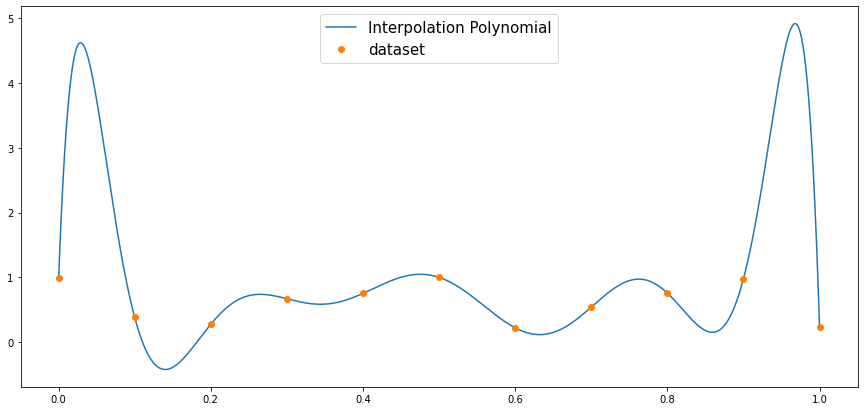

In [7]:
n = 10   # number of interpolation points (minus 1)
x = np.linspace(0, 1, n+1)   # n+1 equispaced nodes (x_k) in [0,1]
y = np.random.rand(n+1)  # n+1 random values for (y_k), uniform in [0,1] (you can try other distributions if you want to)
X = np.linspace(0, 1, 1001)  # values in [0,1] where the interpolation polynomial has to be computed

# computes the coefficients of the polynomial and its values at point X
a = interpVDM(x,y)
PX = evalHorner(a,X)

# plot
plt.figure(figsize = (15,7))
plt.plot(X, PX, label="Interpolation Polynomial")
plt.plot(x, y, marker='o', linestyle='', label="dataset")
plt.legend(fontsize = 15)
plt.show()

### Using polynomial interpolation to approximate functions: first error estimates

In the previous section, we assumed that we were given a dataset $(x_k,y_k)_{k=0,\ldots,n}$, an presented a way to compute the interpolation polynomial of degree at most $n$ for this dataset.

In this section, we assume that we are given a continuous function $f$ on an interval $[a,b]$, and that we want to approximate this function by a polynomial of degree at most $n$. Interpolation naturally gives use a way to do that, by considering the interpolation polynomial for a dataset of the form $(x_k,f(x_k))_{k=0,\ldots,n}$.

<div mardown=1, class='Def'>
    
Let $f$ be a continuous function on an interval $[a,b]$, and $x_0,x_1,\ldots,x_n$ be $n+1$ different points belonging to $[a,b]$. **The interpolation polynomial of $f$**, denoted $P_n(f)$, is the unique polynomial of degree at most $n$ such that
    
$$
P_n(f)(x_k) = f(x_k) \qquad{} \text{for all }k=0,\ldots,n.
$$
    
Notice that the interpolation polynomial depends on the choice of the nodes $x_k$.
    
**The local interpolation error**, denoted $e_n(f)(x)$, is defined as
    
$$
e_n(f)(x) = \vert f(x) - P_n(f)(x) \vert.
$$
    
**The global interpolation error**, denoted $E_n(f)$, is defined as
    
$$
E_n(f) = \sup_{x\in[a,b]} e_n(f)(x) = \sup_{x\in[a,b]} \vert f(x) - P_n(f)(x) \vert.
$$  

The question is to know whether $P_n(f)$ is a good approximation of $f$. More precisely one has to answer the following questions:
- If $P_n(f)$ is used to approximate $f$ at other points than the nodes $x_k$, how confident can we be in the results ?
- How does the error behaves when the number of nodes goes to infinity (i.e. $n$ goes to infinity) ?
- Are there particularly good choices for the nodes $x_k$?

<div markdown=1, class='Ex'>

We first consider equidistant nodes in $[-1,1]$, that is, 

$$
x_k = -1 + \frac{2k}{n}, \quad{}  0\leq k \leq n,
$$

and numerically investigate the behavior of the interpolation polynomial $P_n(f)$ and the error $e_n$, for the following functions

$$
f_1(x) = \vert x \vert, \qquad{} f_2(x) = \sin(2\pi x), \qquad{} f_3(x) = e^{2x}\sin\left(10x\right).
$$

In [8]:
## definition of the functions f1, f2 and f3

def f1(x):
    return np.abs(x)

def f2(x):
    return np.sin(2*np.pi*x)

def f3(x):
    return np.exp(2*x)*np.sin(10*x)

In [9]:
def compare_Pnf_f(f, x, X):
    """
    Plots f and P_n(f) one one side, and the local error e_n(f) = |f-P_n(f)| on the other side
    -----------------------
    Inputs: 
    f : continuous function on [-1,1]
    x : 1D array containing the interpolation nodes in [-1,1]
    X : 1D array containing the points at which f and P_n(f) will be plotted
    
    Output: 2 figures
    left : f and P_n(f)
    right : the local error e_n(f)
    """
    
    y = f(x)   # values of f at the nodes
    a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
    PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X  
    
    n = x.size - 1 # number of nodes, to be dispayed in the title of the figures
    
    plt.figure(figsize=(20, 8))
    
    plt.subplot(121)
    plt.plot(X, f(X), label = 'Target function $f$')
    plt.plot(x, f(x), marker='o', linestyle='', label = 'data set')
    plt.plot(X, PnfX, '--',label = 'Interpolation polynomial $P_n(f)$')
    plt.legend(fontsize = 18)
    plt.xlabel('x', fontsize = 18)
    plt.tick_params(labelsize=18)
    plt.title('f and its interpolation polynomial, n= %i' %n, fontsize = 18)
    
    plt.subplot(122)
    plt.plot(X, abs(f(X) - PnfX), label = '$e_n(f) = |f-P_n(f)|$')
    plt.plot(x, 1e-16*np.ones(x.size), marker='o', linestyle='', label = 'Interpolation nodes')
    plt.legend(fontsize = 18)
    plt.xlabel('x', fontsize = 18)
    plt.tick_params(labelsize=18)
    plt.yscale('log')
    plt.title('Local interpolation error e_n(f) in log-scale, n= %i' %n, fontsize = 18)
    
    plt.show()

<div markdown=1 class="DoIt"> 

Read and try to understand the code of the function `compare_Pnf_f` in the previous cell. Run the following cell for different values of $n$ and different functions ($f_1$, $f_2$ and $f_3$). Comment upon the obtained results.

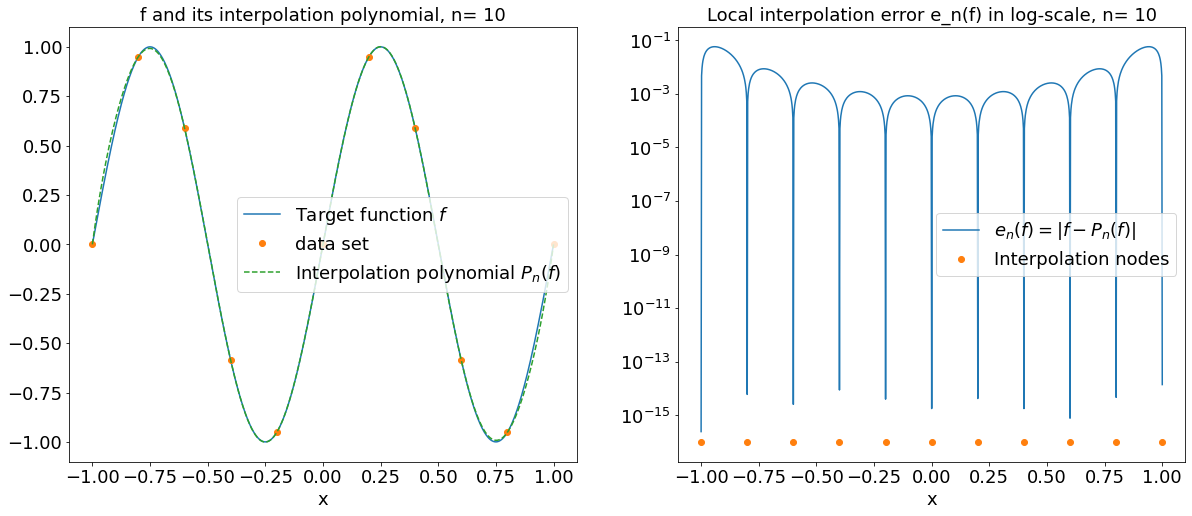

In [10]:
n = 10 # degree of the interpolation polynomial
x = np.linspace(-1, 1, n+1)  # n+1 equispaced nodes for the interpolation
X = np.linspace(-1, 1, 1001)  # the points at which f, P_n(f) and e_n(f) will be plotted

compare_Pnf_f(f2, x, X)  

<div markdown=1, class='Answer'>


In order to better understand what we just observed, we now try to estimate the distance between $P_n(f)$ and $f$. Given $n+1$ interpolations nodes $x_0,\ldots,x_n$, it will be convenient to introduce the polynomial $\Pi_{x_0,\ldots,x_n}$ of degree $n+1$ as

$$
\Pi_{x_0,\ldots,x_n}(x) = (x-x_0)(x-x_1)\cdots(x-x_n).
$$

<div  markdown=1 class="Thm">  <b> Estimation of the error </b> 

Let $f : [a,b] \to \mathbb{R}$ be $n+1$ times differentiable and consider $n+1$ distinct interpolations nodes $x_0,\ldots,x_n$ in $[a,b]$.  Then, for every $x$ in $[a,b]$, there exists $\xi_x \in (a,b)$ such that 

$$
f(x) - P_n(f)(x) = \frac{\Pi_{x_0,\ldots,x_n}(x)}{(n+1)!} f^{(n+1)}(\xi_x).
$$

In particular, we get that

$$
E_n(f) = \sup_{x\in[a,b]} \vert f(x) - P_n(f)(x) \vert \leq \frac{\sup_{x\in [a,b]} \left\vert \Pi_{x_0,\ldots,x_n}(x) \right\vert }{(n+1)!} \sup_{x\in [a,b]} \left\vert f^{(n+1)}(x) \right\vert.
$$

> **Proof. [$\star$]** 
> If $x$ is equal to one of the nodes $x_k$, the first equality holds. So let us prove it if $x\neq x_k$ for all $k=0\ldots n.$ 
>
>To do so, let $x$ be given and consider $P_{n+1}(f)$, the interpolation polynomial of $f$ of degree at most $n+1$ for the $n+2$ nodes $(x,x_0,x_1,\ldots ,x_n)$.
>
> Since $P_{n+1}(f)$ interpolates $f$ at point $x$, we have:
>
>$$
f(x)-P_n(f)(x) = P_{n+1}(f)(x)-P_n(f)(x).
$$
>
>Then, notice that the $n+1$ points $(x_0,\ldots,x_n)$ are roots of the polynomial $P_{n+1}(f)-P_n(f)$, of degree at most $n+1$. As a consequence, we know that there exists a constant $C$ such that, for all $t\in\mathbb{R}$,
>
>\begin{align}
P_{n+1}(f)(t)-P_n(f)(t) &= C \, (t-x_0)(t-x_1)\cdots(t-x_n) \\
&= C\, \Pi_{x_0,\ldots,x_n}(t).
\end{align}
>
>In particular, for $t=x$ we get:
>
>$$
f(x)-P_n(f)(x) = P_{n+1}(f)(x)-P_n(f)(x) = C\, \Pi_{x_0,\ldots,x_n}(x).
$$
>
>It remains to compute the constant $C$. To do so, let us consider the function
>
>$$
g(t) = P_{n+1}(f)(t) - f(t).
$$
>
>This function has at least $n+2$ distinct zeros $x$, $x_0$, ... $x_n$ in $[a,b]$, therefore we can apply $n+1$ times Rolle's theorem to get that $g'$ has at least $n+1$ distinct zeros in $[a,b]$. Repeating this argument recursively until we reach $g^{(n+1)}$, we get that $g^{(n+1)}$ has at least one zero in $[a,b]$:
>
>$$
\exists \xi_x \in[a,b], \quad{} g^{(n+1)}(\xi_x)=0.
$$
>
>Using the fact that $P_{n+1}(f)(t)=P_n(f)(t) +C \, \Pi_{x_0,\ldots,x_n}(t)$ together with the fact that the degree of $P_n(f)$ is at most $n$,  we obtain
>
>\begin{align}
0 &= g^{(n+1)}(\xi_x) \\
& = P_{n+1}(f)^{(n+1)}(\xi_x) - f^{(n+1)}(\xi_x) \\
& = C\,(n+1)! - f^{(n+1)}(\xi_x),
\end{align}
>
>and finally
>
>$$
C = \frac{f^{(n+1)}(\xi_x)}{(n+1)!}
$$
>
>which ends the proof of the first equality. The estimates for $E_n(f)$ immediately follows.

<div markdown=1, class='Rmk'>

From the previous theorem we get an estimation for the interpolation error which depends on  
- the successive derivatives of $f$
- the values of $\Pi_{x_0,\ldots,x_n}$ which itself depends on the nodes that have been used for the interpolation. 

This suggests that the choice of the the nodes could have a significant impact on the quality of the approximation. We are going to investigate this point in the next subsection.

Before that, notice that the above theorem allows us to conclude that $P_n(f)$ converges to $f$ for some *very regular* functions.

<div  markdown=1 class="Thm">  <b>Uniform convergence for "regular" functions </b> 

Let $f : [a,b] \to \mathbb{R}$ be $\mathcal{C}^\infty$ and such that 

$$
\exists M>0, \quad{} \forall n\geq 0,\quad{} \sup_{x\in [a,b]} \lvert f^{(n)}(x)\rvert \leq M^n.
$$

Then, whatever the choice of the interpolation nodes, $P_n(f)$ *converges uniformly* to $f$ on the interval $[a,b]$:

$$
E_n(f) = \sup_{x\in[a,b]}\,\lvert f(x) - P_n(f)(x) \rvert \underset{n\to\infty}{\longrightarrow}0.
$$

<div markdown=1 class="DoIt"> Complete the proof of the previous theorem.

> **Proof.** 

<div markdown=1, class='Rmk'>

This theorem applies to the functions $f_2(x) = \sin(2\pi x)$ and $f_3(x) = e^{2x}\sin\left(10x\right)$ that we already considered before (for $f_3$ it is not completely obvious, but you can try to show it as an exercise), and proves that, in theory, $P_n(f)$ should converge to $f$ in both cases.

<div markdown = 1, class = "DoIt"> 

Complete the following function `ErrorEqui` to compute the global interpolation error $E_n(f)$ for equidistant interpolation points and several values of $n$. In practice, you can approximate 

$$
E_n(f) = \sup_{x\in[a,b]}\,\lvert f(x) - P_n(f)(x) \rvert 
$$

by

$$
\max_{i\in I}\,\lvert f(X_i) - P_n(f)(X_i) \rvert,
$$

where $\left(X_i\right)_{i\in I}$ is a sufficiently fine discretization of $[a,b]$.

Then, use this function in the subsequent cell to plot the evolution of $E_n(f)$ with $n$ (use a log scale), for both functions $f_2$ and $f_3$. What happens when $n$ becomes too large?  Comment on the results. 

In [11]:
def ErrorEqui(f, nmax, X):
    """
    Approximates the global interpolation error E_n(f) = sup_{[-1,1]} |f-P_n(f)| for n=0,...,nmax,
    by computing sup_{X_i in X} |f(X_i)-P_n(f)(X_i)|. 
    Here P_n(f) is the interpolation polynomial for equidistant nodes.
    -----------------------
    Inputs: 
    f : continuous function on [-1,1]
    nmax : integer, largest n for which the error has to be computed
    X : 1D array containing the points at which f and P_n(f) will be evaluated to compute E_n(f)
    
    Output:
    tab_Enf : 1D array containing [E_0(f), E_1(f), ..., E_{nmax}(f)]
    """
    
    tab_n = np.arange(0,nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed
    tab_Enf = np.zeros(nmax+1) # Pre-allocation
    for n in tab_n:
        x = np.linspace(-1,1,n+1)# n+1 equispaced nodes to compute the interpolant
        y = f(x) # values of f at the nodes
        a = interpVDM(x,y) # the coefficients of the interpolation polynomial P_n(f)
        PnfX = evalHorner(a,X) # values of P_n(f) at the points stored in X   
        tab_Enf[n] = np.max(np.abs(f(X)-PnfX)) # computation of E_n(f)
    return tab_Enf

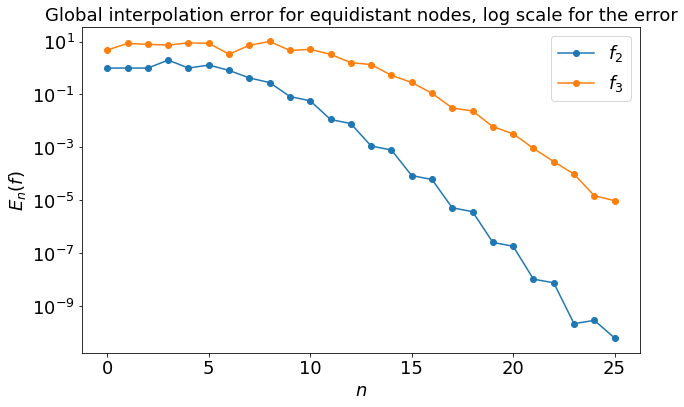

In [12]:
## graphical study of the convergence

nmax = 25
X = np.linspace(-1,1,1001)

tab_Enf2 = ErrorEqui(f2, nmax, X)
tab_Enf3 = ErrorEqui(f3, nmax, X)
tab_n = np.arange(0, nmax+1)

plt.figure(figsize=(10, 6))
    
plt.plot(tab_n, tab_Enf2, marker='o', label='$f_2$')
plt.plot(tab_n, tab_Enf3, marker='o', label='$f_3$')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error for equidistant nodes, log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f)$',fontsize = 18)
plt.tick_params(labelsize=18)

plt.show()

<div markdown=1, class='Answer'>

<div markdown=1, class='Rmk'>

On this example, we again see clearly the two different sources of errors that occur when we try to approximate $f$.
- There are errors coming from the fact that we replace $f$ by $P_n(f)$. As we have seen, in some cases one can prove that the error between $f$ and $P_n(f)$ goes to zero when $f$ goes to infinity.
- There are also errors coming from the fact that our algorithms have to use machine numbers only instead of all the real numbers, and therefore the interpolation polynomial that is produced by our algorithm is not exactly $P_n(f)$. 
The error between $f$ and $P_n(f)$ are predominant when $n$ is small, but when $n$ becomes larger the rounding error start to have a noticeable impact.

### Using polynomial interpolation to approximate functions: Runge's phenomenon

<img src="figures/Runge.jpg" alt="Runge" style="width: 150px;"/>
  
>**Carl David Tolmé Runge (1856-1927).**
> Carl David Tolmé Runge was a German mathematician, physicist, and spectroscopist. In the field of numerical analysis, he is the co-developper of the Runge-Kutta method to approximate the solution to differential equations. He discorvered the now called "Runge's phenomenon" in 1901 when exploring the behavior of errors when using polynomial interpolation to approximate certain functions. Runge's phenomenon is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points. The discovery was important because it shows that, for equispaced points, going to higher degrees does not always improve accuracy. The phenomenon is similar to the Gibbs phenomenon in Fourier series approximations.

In the previous subsection, we studied two examples of $\mathcal{C}^\infty$ functions for which, with equidistant interpolation nodes, the interpolation polynomial $P_n(f)$ was converging uniformly to $f$ on a given interval. However, even for $\mathcal{C}^\infty$ functions, the theoretical results we have only guarantee the convergence under some additional assumption on the behavior of the derivatives of $f$. The following example 

$$f_{Runge} (x) = \frac{1}{1+25x^2},$$

due to Runge, shows that there exist $\mathcal{C}^\infty$ functions, which are rather innocent-looking, for which $P_n(f)$ does not converge uniformly to $f$ with equidistant nodes.

<div markdown=1 class="DoIt"> 

Complete the following cell in order to plot the interpolation  polynomial of the Runge function on $[-1,1]$ for $n=10$ and $n=20$ equidistant nodes. You can use the `compare_Pnf_f` function. What do you observe? You can confirm your observations using the `ErrorEqui` function.

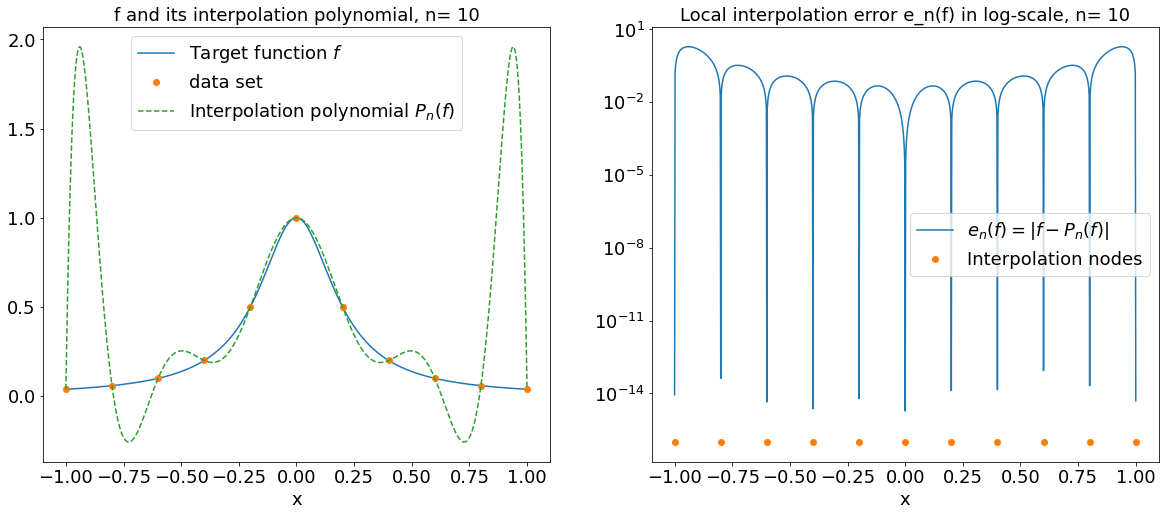

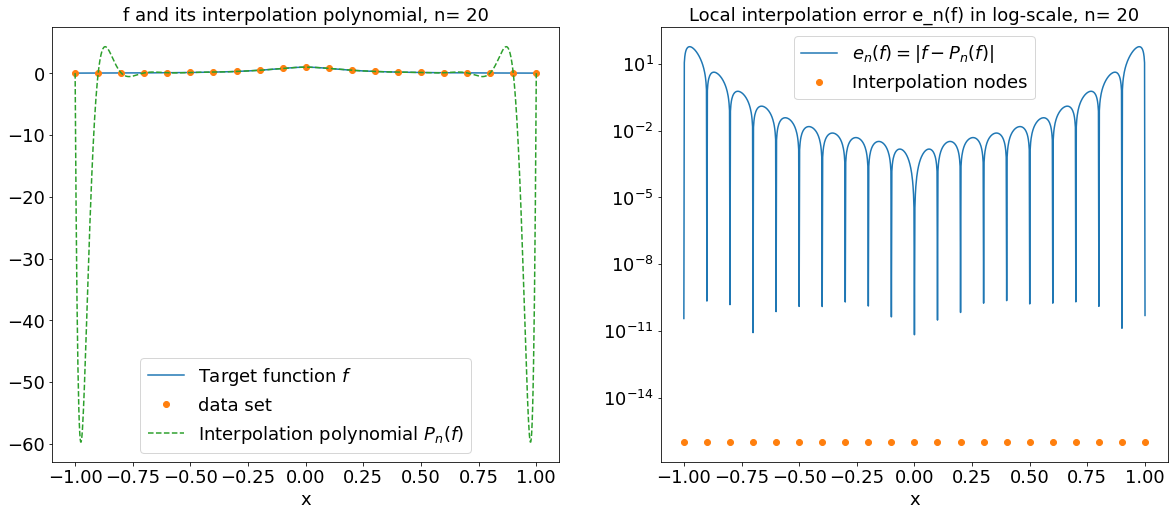

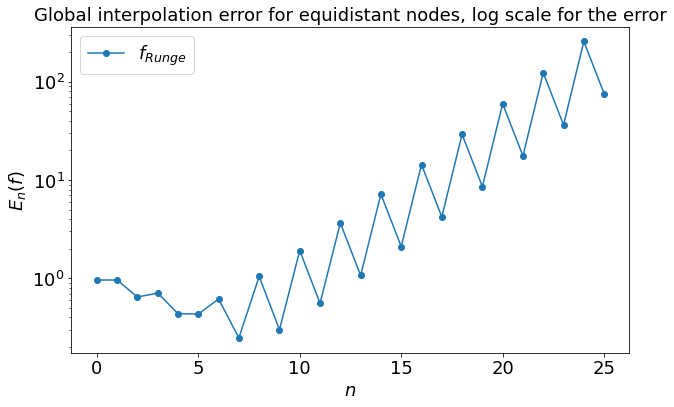

In [13]:
def f_Runge(x):
    return 1/(1+25*x**2)

n1 = 10
n2 = 20
x1 = np.linspace(-1, 1, n1+1) # n1+1 equispaced nodes in [-1,1]
x2 = np.linspace(-1, 1, n2+1) # n2+1 equispaced nodes in [-1,1]
X = np.linspace(-1, 1, 1001)  # the points at which f, P_n(f) and e_n(f) will be evaluated and plotted


# Plots of f, P_n(f) and e_n(f), using compare_Pnf_f
compare_Pnf_f(f_Runge, x1, X)

compare_Pnf_f(f_Runge, x2, X)


## graphical study of the convergence

nmax = 25

tab_n = np.arange(0,nmax+1)
tab_Enf_Runge = ErrorEqui(f_Runge, nmax, X) # Errors [E_0(f), E_1(f), ..., E_{nmax}(f)]

plt.figure(figsize=(10, 6))
    
plt.plot(tab_n, tab_Enf_Runge, marker='o', label='$f_{Runge}$')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error for equidistant nodes, log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f)$',fontsize = 18)
plt.tick_params(labelsize=18)

plt.show()

<div mardown=1, class='Answer'>

<div markdown=1, class='Rmk'>

This example strongly suggests that polynomial interpolation with a large number of nodes is not necessarily a good strategy to approximate functions, **if we use equidistant nodes**. As we will see in the next subsection, polynomial interpolation  with a large number of nodes actually performs well for any function which is at least somewhat smooth (say Lipschitz), **provided appropriate nodes are selected**, like the Chebyshev nodes.

### Using polynomial interpolation to approximate functions: optimal choice for the nodes

<img src="figures/Chebyshev.jpg" alt="Chebyshev" style="width: 200px;"/>
  
>**Pafnuty Lvovich Chebyshev (1821-1894).**
>Pafnuty Lvovich Chebyshev is a Russian mathematician. He is known for his work in the fields of probability, statistics, mechanics, and number theory. He is also known for the "Chebyshev polynomials", which are a sequence of orthogonal polynomials. He introduced these polynomials to minimize the problem of Runge's phenomena in polynomial approximation of functions. These polynomials are also used in numerical integration and are solution to special cases of the Sturm–Liouville differential equation that occur very commonly in mathematics, particularly when dealing with linear partial differential equations.


To enhance the quality of the approximation, one can look for better nodes $(x_k)_k$. Indeed, recalling the estimation: 

$$
f(x) - P_n(f)(x) = \frac{\Pi_{x_0\ldots\,x_n}(x)}{(n+1)!} f^{(n+1)}(\xi_x),
$$

one could choose the interpolations nodes $x_0, x_1, \ldots, x_n$ so as to minimize the quantity

$$
\left\Vert \Pi_{x_0\ldots\,x_n} \right\Vert_\infty = \sup_{x\in [a,b]}\lvert \Pi_{x_0\ldots\,x_n}(x) \rvert =  \sup_{x\in [a,b]}\lvert (x-x_0)(x-x_1)\ldots(x-x_n) \rvert.
$$

It turns out that one choice of $n+1$ nodes $x_0,\ldots,x_n$ that achieves this minimum for $[a,b] = [-1,1]$ is well-known, and is related to the Chebyshev polynomials that we now introduce.

<div  markdown=1 class="Def"> The Chebyshev polynomial of order $n$ is noted $T_n$ and is defined by induction: $T_0(X) = 1$, $T_1(X) = X$ and, for all $n\geq 1$

$$T_{n+1}(X) = 2XT_n(X) - T_{n-1}(X).$$

The Chebyshev polynomials satisfy the following important properties.

<div  markdown=1 class="Prop"> For all $n \in \mathbb{N}$, the polynomial $T_n$ has the following properties:

- $T_n$ is a polynomial of degree $n$ and, if $n\geq 1$, the leading coefficient is $2^{n-1}$.

- For all $\theta \in \mathbb{R}$,

$$ T_n(\cos\theta) = \cos(n\theta). $$

- $T_{n+1}$ has $n+1$ (distinct) roots in $(-1,1)$ given by

$$\hat{x}_k = \cos\left(\frac{2k + 1}{2n+2}\pi\right), \qquad{} 0 \leq k \leq n.$$

- $T_{n+1}(x) = 2^{n}(x-\hat{x}_0)\cdots(x-\hat{x}_{n})$.

- For $x\in [-1,1]$, one has $-1 \leq T_n(x) \leq 1$. If we let $\hat{y}_k = \cos\left(\frac{k\pi}{n}\right)$ for $0\leq k \leq n$, we have

$$-1= \hat{y}_n < \hat{y}_{n-1} < \cdots < \hat{y}_0 = 1 \quad{} \text{with} \quad{} T_n\left(\hat{y}_k\right) = (-1)^{k}.$$

>**Proof.** [$\star$]
>
>- **Degree and leading coefficient:** By definition, $T_0$ is of degree $0$, and $T_1$ is of degree $1$ and has leading coefficient $2^{1-1} = 1$. Let us show the same result for $n+1>1$ by induction, assuming the result is true for all $k \leq n$. Using
$$T_{n+1}(X) = 2XT_{n}(X) - T_{n-1}(X),$$
we have that $T_{n+1}$ is the sum of a polynomial of degree $n+1$ and a polynomial of degree $n-1$. Thus, it is of degree $n+1$. Finally, the leading coefficient of $T_{n+1}$ is the leading coefficient of $2XT_{n}(X)$, it is therefore equal to $2\times 2^{n-1} = 2^n$.
>
>- **Trigonometric identity**: We also prove this by induction. For the base cases, we indeed have $T_0(cos\theta) = 1 = \cos(0\theta)$ and $T_1(\cos\theta) = \cos\theta = \cos(1\theta)$. Let us assume the result is true for $k\leq n$, and show that it then holds for $n+1$. Using the assumption for $k=n-1,n$, and the trigonometric formula $2\cos(a)\cos(b) = \cos(a+b) + \cos(a-b)$, we get
\begin{align}
T_{n+1}(\cos\theta) &= 2\cos\theta T_{n}(\cos\theta) - T_{n-1}(\cos\theta) \\
&= 2\cos\theta \cos(n\theta) - \cos((n-1)\theta) \\
&= \cos((n+1)\theta) + \cos((n-1)\theta) - \cos((n-1)\theta) \\
&= \cos((n+1)\theta). 
\end{align}
>
>- **Roots:** We use the fact that $T_{n+1}(\cos\theta)=\cos((n+1)\theta)$, and look for zeros of $\cos((n+1)\theta)$, that is, $(n+1)\theta = \frac{\pi}{2} \text{ mod } \pi$. In particular, setting $\theta_k=\frac{2k+1}{2(n+1)}\pi$, $k=0,\ldots,n$, we have 
$$
T_{n+1}(\hat x_k) = T_{n+1}(\cos\theta_k) = \cos((n+1)\theta_k) = 0.
$$
All the $\hat x_k$ for $k=0,\ldots,n$ are different because all the $\theta_k$ belong to $(0,\pi)$ and the cosine function is injective on that interval. Therefore, we have found $n+1$ zeros of $T_{n+1}$ and since $T_{n+1}$ is a polynomial of degree $n+1$ we have all of them.
>
>- **Expression of $T_{n+1}$:** Since the $\hat x_k$, $k=0,\ldots,n$, are the roots of $T_{n+1}$ which is of degree $n+1$, we must have 
$$
T_{n+1}(X) = C \left(X - \hat{x}_0\right) \left(X - \hat{x}_1\right)\cdots \left(X - \hat{x}_{n}\right),
$$
for some constant $C$, which must be $2^{n}$ because we have already proven that the leading coefficient of $T_{n+1}$ is $2^{n}$.
>
>- **Extremal values:** We again use the formula $T_n(\cos\theta) = \cos(n\theta)$, which immediately yields that $-1 \leq T_n(x) \leq 1$ for $x\in[-1,1]$. In order to find the extremal values, we solve $\cos(n\theta) = \pm 1$, which gives the announced values $\hat y_k$.

It turns out that the roots $\hat x_k$ of $T_{n+1}$ make excellent interpolation nodes, as we will see in a moment. 

<div  markdown=1 class="Def"> 

Consider the interval $[-1,1]$. For any $n\geq 0$, the $n+1$ **Chebyshev nodes** are given by

$$
\hat x_k = \cos\left(\frac{2k + 1}{2n+2}\pi\right), \qquad{} 0 \leq k \leq n. \nonumber
$$

<div markdown=1 class='Fur'>

The extremal points $\hat y_k$ make equally excellent interpolation nodes, but to keep things simple we only consider interpolation at the nodes $\hat x_k$ in this course.

For a given value of $n$, let us denote by $(\overline x_k)_{k=0,\ldots,n}$ the $n+1$ equidistant points in $[-1,1]$ and let us compare on $[-1,1]$ the two following polynomials:


$$\bar \Pi(x) = \Pi_{\bar x_0\ldots\,\bar x_n}(x) = (x- \overline x_0)(x-\overline x_1)\cdots(x-\overline x_n),$$

$$\hat \Pi(x) = \Pi_{\hat x_0\ldots\,\hat x_n}(x) = \frac{T_{n+1}(x)}{2^{n}} = (x-\hat x_0)(x-\hat x_1)\cdots(x-\hat x_n),$$

corresponding to equidistant nodes and to Chebyshev nodes respectively.

<div markdown=1 class="DoIt"> 

Complete the following function to obtain the roots of $T_n$ for any given integer $n$.

In [14]:
def xhat(n):
    """
    function returning the zeros of Tn
    -----------------------
    Inputs: 
    n : the degree of Tn
    
    Output:
    1D array containing the n roots of Tn
    """
    if n == 0:
        return np.array([])
    else:
        return np.array([np.cos((2*k+1)/(2*n+2)*np.pi) for k in range(n+1)])
print(xhat(7))

[ 0.98078528  0.83146961  0.55557023  0.19509032 -0.19509032 -0.55557023
 -0.83146961 -0.98078528]


<div markdown=1 class="DoIt"> 

Complete the code of the function `evalPolywithRoots` in the following cell, to evaluate a polynomial of the form:

$$P = (x-x_0)(x-x_1)...(x-x_n).$$

In [15]:
def evalPolywithRoots(x,X):
    """
    Evaluation of a monic polynomial described by its roots.
    -----------------------
    Inputs: 
    x : the zeros x_0,...,x_n of the polynomial P
    X : an array of values at which we want to evaluate P 
    
    Output: 
    an array containing the values P(X_k) for each X_k in X
    """
    PX = 2**(len(x)-1)
    X=np.array(X)
    for xk in x:
        PX *=  (X-xk)
    return PX



<div markdown=1 class="DoIt"> 

Complete the following cell to plot $\overline \Pi$ and $\hat \Pi$ on $[-1,1]$ for different values of $n$. What do you observe? How do you expect this to impact the quality of polynomial interpolation using Chebyshev nodes versus equidistant nodes?

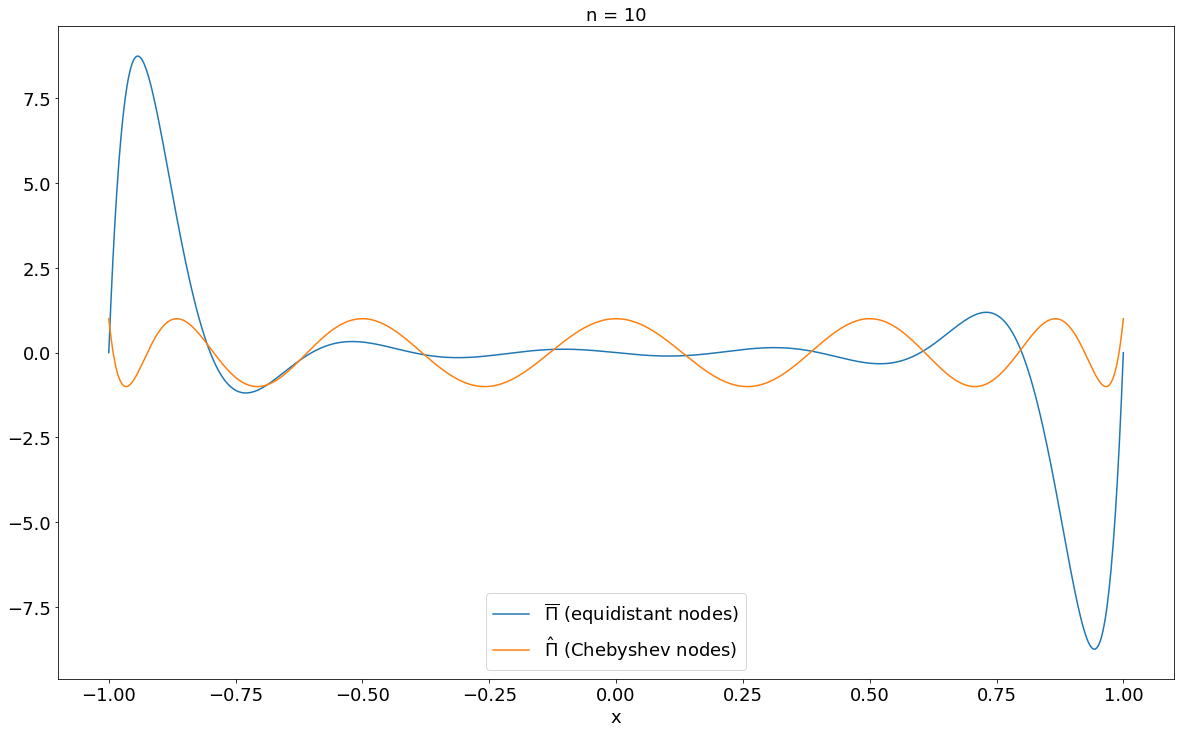

In [16]:
n = 10
x_equi = np.linspace(-1,1,n+1) # n+1 equispaced nodes
x_cheb = xhat(n+1)  # n+1 chebychev nodes
X = np.linspace(-1, 1, 1001)  # the points at which the polynomials will be evaluated and plotted

# Evaluate \bar Pi for equispaced nodes
Pi_equi = evalPolywithRoots(x_equi,X)
# Evaluate \hat Pi for chebychev nodes
Pi_cheb = evalPolywithRoots(x_cheb,X) 

# plots
plt.figure(figsize = (20,12))
plt.plot(X, Pi_equi, label='$ \overline{\Pi}$ (equidistant nodes)')
plt.plot(X, Pi_cheb, label='$\hat \Pi$ (Chebyshev nodes)')
plt.xlabel('x',fontsize = 18)
plt.legend(fontsize = 18, loc = 'lower center')
plt.title('n = %i' %n, fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

<div markdown=1, class='Answer'>


In fact, for a given value of $n$, the following theorem proves that the Chebyshev nodes $\hat x_0,\ldots,\hat x_n$ are an optimal choice of nodes to minimize $\|\Pi_{x_0,\ldots,x_n}\|_\infty$:

<div  markdown=1 class="Thm"> Let $n \in \mathbb{N}$. For any set of nodes $x_0,\ldots,x_n$ in $[-1,1]$, 

$$ \left\Vert \Pi_{\hat x_0,\ldots,\hat x_n} \right\Vert_\infty  \leq \left\Vert \Pi_{x_0,\ldots,x_n}\right\Vert_\infty.$$

> **Proof. [$\star$]** 
>Let $x_0,\ldots,x_n$ be a set of nodes in $[-1,1]$, and consider
>
>$$\Pi(x)=(x-x_0)(x-x_1)\cdots(x-x_n),$$
>
>and 
>
>$$\hat \Pi(x) = \frac{T_{n+1}(x)}{2^{n}} = (x-\hat x_0)(x-\hat x_1)\cdots(x-\hat x_n).$$ 
>
>We have to prove that
>
>$$
\sup_{x \in [-1,1]} \lvert \hat\Pi(x) \rvert \leq \sup_{x \in [-1,1]} \lvert \Pi(x) \rvert.
$$
>
> Assume by contradiction that 
> $$\sup_{x \in [-1,1]} \lvert \Pi(x)\rvert < \sup_{x \in [-1,1]} \hat\Pi(x), $$
> which can be rewritten
>$$
\sup_{x \in [-1,1]} \lvert \Pi(x)\rvert < \sup_{x \in [-1,1]} \frac{\lvert T_{n+1}(x)\rvert}{2^{n}}.
$$
> 
> From this and the properties of $T_{n+1}$ we then have that, for all $x\in [-1,1]$, $\displaystyle \lvert \Pi(x) \rvert < \frac{1}{2^{n}}$. 
>
> Let us now consider 
>
>$$D_{n}(x) = \Pi(x) - \hat\Pi(x)  = \Pi(x) - \frac{ T_{n+1}(x)}{2^{n}},
$$ 
> 
>which is a polynomial of degree at most $n$ (since the coefficient of degree $n+1$ in both $\Pi$ and $\hat\Pi$ is $1$). Our goal is to show that $D_n=0$, which would be a contradiction. For $k=0,\ldots,n+1$ and $\hat y_k = \cos\left(\frac{k\pi}{n+1}\right)$, we have
>
>$$
\hat\Pi( \hat y_k) = \frac{ T_{n+1}(\hat y_k)}{2^{n}} = \frac{ (-1)^k}{2^{n}}.
$$
>
> However, since $\displaystyle \lvert \Pi(x) \rvert < \frac{1}{2^{n}}$, we have that $D_{n}(\hat y_k)$ is positive for even $k$ and negative for odd $k$, $0\leq k\leq n+1$. In particular, $D_{n}$ has at least $n+1$ zeros by the intermediate value theorem, but $D_n$ is a polynomial of degree at most $n$, so it must be $0$. This is a contradiction ($\Pi \neq \hat\Pi$ because we assumed $\sup_{x \in [-1,1]} \lvert \Pi(x)\rvert < \sup_{x \in [-1,1]} \hat\Pi(x)$), and the theorem is proven.

In particular, we have $\|\hat \Pi\|_\infty  \leq \|\bar \Pi\|_\infty$ for any number of nodes $n$, as suggested by the previous numerical experiment.

<div markdown=1 class="DoIt"> 

Complete the following cell in order to plot the interpolation polynomial of the Runge function on $[-1,1]$ for $n=10$ and $n=20$ Chebyshev nodes. You can use the `compare_Pnf_f` function. How do the results compare with what you obtained previously for equidistant nodes?

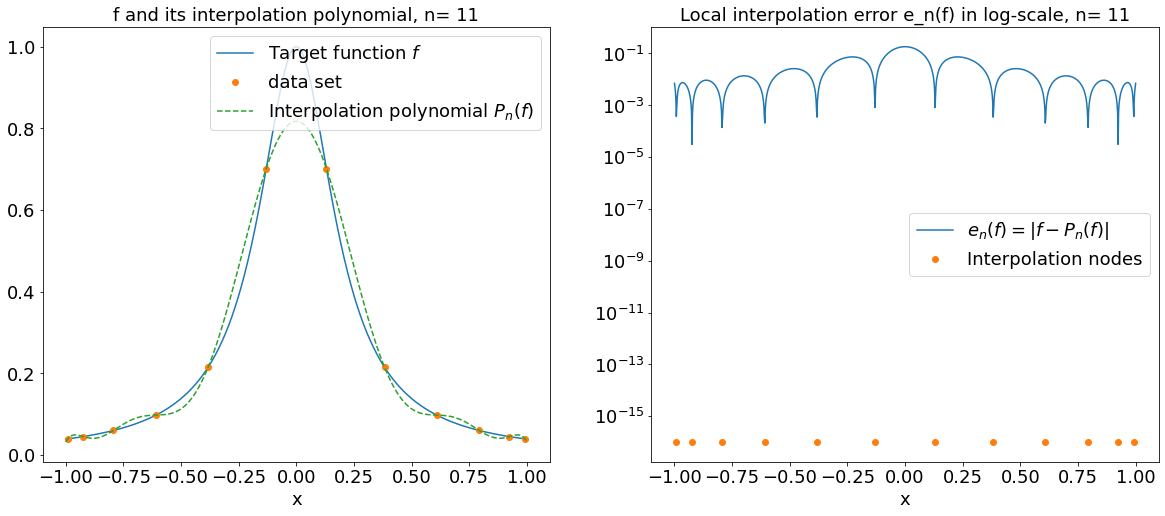

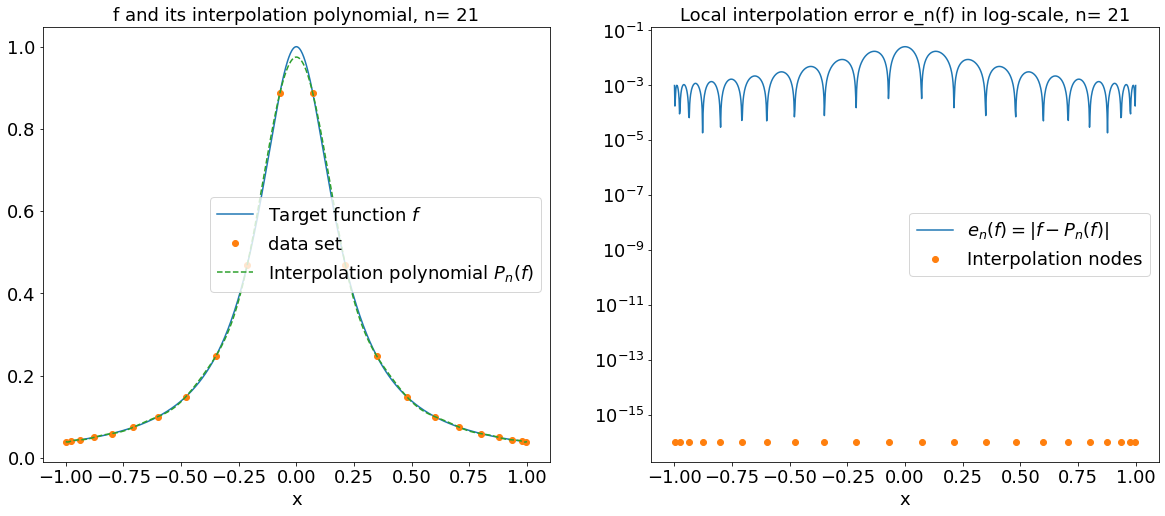

In [17]:
n1 = 10
n2 = 20
x1 = xhat(n1+1) # n1+1 Chebyshev nodes in [-1,1]
x2 = xhat(n2+1) # n2+1 Chebyshev nodes in [-1,1]
X = np.linspace(-1, 1, 1001)  # the points at which f, P_n(f) and e_n(f) will be evaluated and plotted


# Plots of f, P_n(f) and e_n(f), using compare_Pnf_f
compare_Pnf_f(f_Runge, x1, X)

compare_Pnf_f(f_Runge, x2, X)

<div markdown=1, class='Answer'>

As expected, the interpolation polynomials obtained with Chebyshev nodes give a much better approximation of the Runge function than the one obtained with equidistant nodes: the oscillations close to the boundary disappeared, and it looks like $P_n(f)$ is now converging to $f$.

<div markdown = 1, class = "DoIt"> 

Using the cell below, compare also $f_1$ and the interpolation polynomial $P_n(f_1)$ obtained with Chebyshev nodes, for different values of $n$. Do the result differ from what you obtained previously with equidistant nodes?

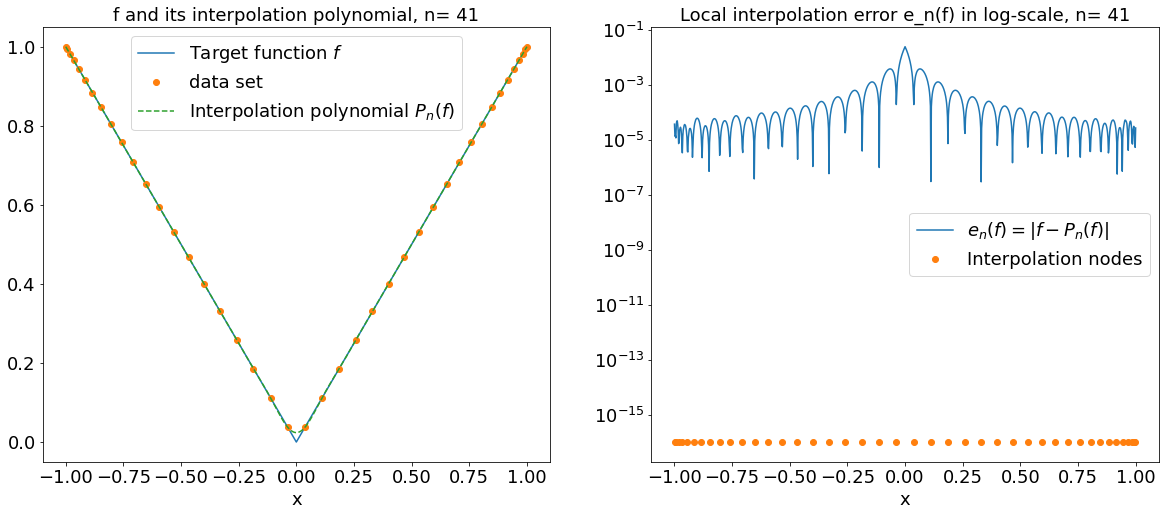

In [18]:
n = 40 # degree of the interpolation polynomial
x = xhat(n+1)  # n+1 Chebyshev nodes for the interpolation
X = np.linspace(-1,1,1001)  # the points at which f, P_n(f) and e_n(f) will be plotted

compare_Pnf_f(f1, x, X)  

<div markdown=1, class='Answer'>

<div markdown = 1, class = "DoIt"> 

Complete the following function `ErrorCheb` to compute the global interpolation error $E_n(f)$ for Chebyshev interpolation points and several values of $n$. In practice, you can approximate 

$$
E_n(f) = \sup_{x\in[-1,1]}\,\lvert f(x) - P_n(f)(x) \rvert 
$$

by

$$
\max_{i\in I}\,\lvert f(X_i) - P_n(f)(X_i) \rvert,
$$

where $\left(X_i\right)_{i\in I}$ is a sufficiently fine discretization of $[-1,1]$.

Then, use this function in the subsequent cell to plot the evolution of $E_n(f)$ with $n$ (use a log scale), for the functions $f_1$, $f_2$, $f_3$ and $f_{Runge}$. Comment on the results. 

In [19]:
def ErrorCheb(f, nmax, X):
    """
    Approximates the global interpolation error E_n(f) = sup_{[-1,1]} |f-P_n(f)| for n=0,...,nmax,
    by computing sup_{X_i in X} |f(X_i)-P_n(f)(X_i)|. 
    Here P_n(f) is the interpolation polynomial for Chebyshev nodes.
    -----------------------
    Inputs: 
    f : continuous function on [-1,1]
    nmax : integer, largest n for which the error has to be computed
    X : 1D array containing the points at which f and P_n(f) will be evaluated to compute E_n(f)
    
    Output:
    tab_Enf : 1D array containing [E_0(f), E_1(f), ..., E_{nmax}(f)]
    """
    
    tab_n = np.arange(0,nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed
    tab_Enf = np.zeros(nmax+1) # Pre-allocation
    for n in tab_n:
        x = xhat(n+1) # n+1 Chebyshev nodes to compute the interpolant
        y = f(x) # values of f at the nodes
        a = interpVDM(x,y) # the coefficients of the interpolation polynomial P_n(f)
        PnfX = evalPolywithRoots(x,X) # values of P_n(f) at the points stored in X   
        tab_Enf[n] = np.max(np.abs(f(X)-PnfX)) # computation of E_n(f)
    return tab_Enf

[1.125      2.         1.72209155 2.         1.86937631 2.
 1.92500428 2.         1.95152951 2.         1.96599408 2.
 1.97367675 2.         1.97796771 2.         1.9805861  2.
 1.98719614 2.         1.98961571 2.         1.98661983 2.
 1.98086464 2.         1.99135048 2.         1.98330439 2.
 1.95747694 2.         1.99105141 2.         1.99284793 2.
 1.9656518  2.         1.97000502 2.         1.95897465]


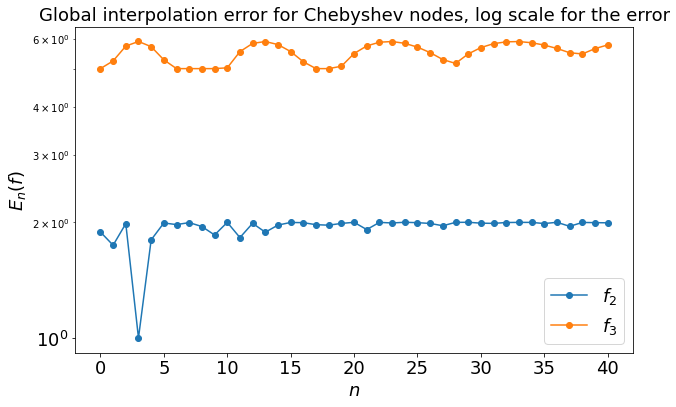

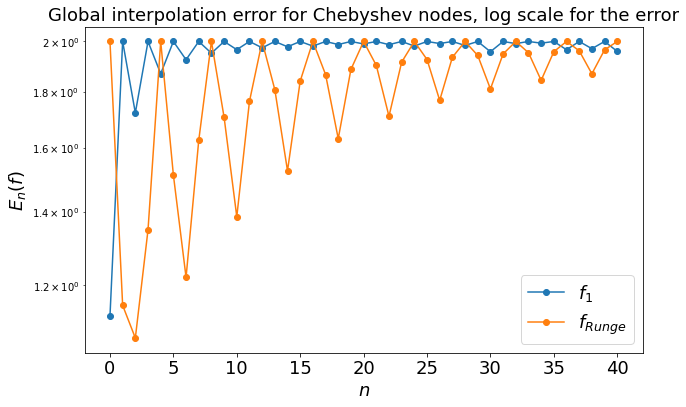

In [20]:
## graphical study of the convergence

nmax = 40
X = np.linspace(-1,1,1001)

tab_Enf1 = ErrorCheb(f1, nmax, X)
tab_Enf2 = ErrorCheb(f2, nmax, X)
tab_Enf3 = ErrorCheb(f3, nmax, X)
tab_EnfRunge = ErrorCheb(f_Runge, nmax, X)
tab_n = np.arange(0, nmax+1)

print(tab_Enf1)

plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_Enf2, marker='o', label='$f_2$')
plt.plot(tab_n, tab_Enf3, marker='o', label='$f_3$')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error for Chebyshev nodes, log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f)$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_Enf1, marker='o', label='$f_1$')
plt.plot(tab_n, tab_EnfRunge, marker='o', label='$f_{Runge}$')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error for Chebyshev nodes, log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f)$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()


<div markdown=1, class='Answer'>

<div markdown=1, class='Fur'> [$\star$] For the function $f_1$, the convergence is so slow that one can wonder whether the error would really go to zero in the absence of rounding errors. The convergence can actually be proven theoretically in that case, but this goes beyond the scope of this course.

<div markdown = 1, class = "DoIt"> 

Finally, for the functions $f_2$ and $f_3$, for which the interpolation polynomial converges for equidistant and Chebyshev nodes, plot the global error $E_n(f)$ versus $n$ on the same picture for both choices of nodes. Conclude.

<div markdown=1, class='Answer'>

<div markdown = 1, class = "Rmk"> 

We only dealt with interpolation at Chebyshev nodes on the interval $[-1,1]$, but this can easily be generalized on any interval $[a,b]$ via the affine bijection $x\mapsto a+\frac{x+1}{2}(b-a)$.

<div markdown = 1, class = "Fur"> [$\star$]

- We have clearly seen the superiority of the Chebyshev nodes in practice, and justified it to some extent, based on the estimate
$$
f(x) - P_n(f)(x) = \frac{\Pi_{x_0\ldots\,x_n}(x)}{(n+1)!} f^{(n+1)}(\xi_x),
$$
and the fact that the Chebyshev nodes minimize $\left\Vert \Pi_{x_0\ldots\,x_n} \right\Vert_\infty$. However, one can do even better for the Chebyshev nodes, and prove that, as soon as $f$ is *a bit more than continuous* (for example Lipschitz), then the interpolation polynomial at the Chebyshev nodes converges uniformly to $f$ (with a speed depending on the regularity of $f$). This proves that for the function $f_1$ considered previously, $P_n(f_1)$ does indeed converge to $f_1$ for Chebyshev nodes.
- Finally, we point out that the algorithm that we used to compute the interpolation polynomial, namely solving the linear system given by the Vanderpol matrix, has the merit of being very simple to implement, but is known to be somewhat ill-behaved (*ill-conditioned*) when $n$ becomes too large, and that there exist better implementations which are less sensitive to rounding errors.

### Using polynomial interpolation to approximate functions: Instabilities and noisy data...

In the previous subsection, we have seen that rounding errors could produce some kind of **instability** in our algorithms when $n$ becomes large, especially with uniform interpolation nodes. Here we are going to see that the instability can already manifest itself for moderate values of $n$ in a slightly different context, namely noisy data.

Indeed, suppose that we want to interpolate a function $f$ at points $x_0,\ldots,x_n$, and suppose that the available values of $f$ at these points are not exact (think for example of noise due to experimental measurements). To model this phenomenon, when we compute the interpolation polynomial we are going to replace $f(x_k)$ by $f(x_k) + \epsilon_k$, with $\epsilon_k$ a random variable of small amplitude. 

Obviously, we can no longer expect $P_n(f)$ to represent $f$ very accurately, but one would like the error to have roughly the same magnitude as the noise.

<div markdown=1 class="DoIt"> Run the following cell to observe the behavior of the interpolation polynomial, with noisy data. Experiment with the parameters, and in particular try different values of $n$. Comment on the results, and on the influence of the two choices for the nodes.

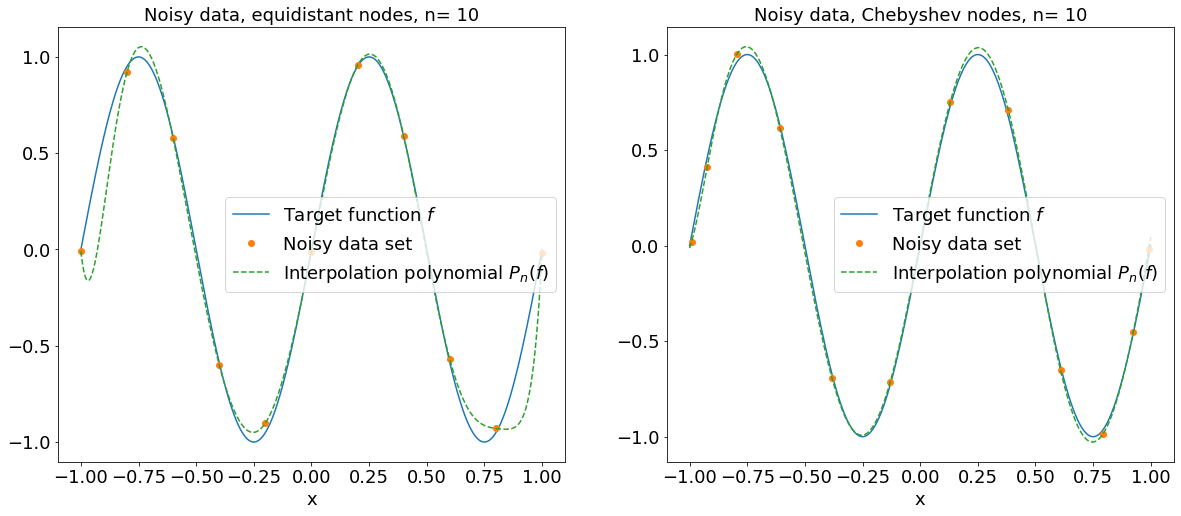

In [21]:
f = f2 # the function for which we do the test

eps = 0.05 # magnitude of the noise

def noise(x): 
    return eps * ( 2*np.random.rand(x.size)-1 ) # as many random values in [-eps,eps] as elements in x

n = 10 # degree of the interpolation polynomial
x_equi = np.linspace(-1, 1, n+1)  # n+1 equidistant nodes for the interpolation
x_cheb = xhat(n+1)  # n+1 Chebyshev nodes for the interpolation
X = np.linspace(-1, 1, 1001)  # the points at which f and P_n(f) will be plotted

# Computation of the interpolation polynomials for noisy data and equidistant nodes
y_equi = f(x_equi) + noise(x_equi)  # noisy values of f at the nodes
a_equi = interpVDM(x_equi, y_equi) # the coefficients of the interpolation polynomial P_n(f)
PnfX_equi = evalHorner(a_equi, X) # values of P_n(f) at the points stored in X 

# Computation of the interpolation polynomials for noisy data and equidistant nodes
y_cheb = f(x_cheb) + noise(x_cheb)  # noisy values of f at the nodes
a_cheb = interpVDM(x_cheb, y_cheb) # the coefficients of the interpolation polynomial P_n(f)
PnfX_cheb = evalHorner(a_cheb, X) # values of P_n(f) at the points stored in X 
 
    
plt.figure(figsize=(20, 8))
    
plt.subplot(121)
plt.plot(X, f(X), label = 'Target function $f$')
plt.plot(x_equi, y_equi, marker='o', linestyle='', label = 'Noisy data set')
plt.plot(X, PnfX_equi, '--',label = 'Interpolation polynomial $P_n(f)$')
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)
plt.title('Noisy data, equidistant nodes, n= %i' %n, fontsize = 18)

plt.subplot(122)
plt.plot(X, f(X), label = 'Target function $f$')
plt.plot(x_cheb, y_cheb, marker='o', linestyle='', label = 'Noisy data set')
plt.plot(X, PnfX_cheb, '--',label = 'Interpolation polynomial $P_n(f)$')
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)
plt.title('Noisy data, Chebyshev nodes, n= %i' %n, fontsize = 18)

plt.show()

<div markdown=1, class='Answer'> 

<div markdown=1, class='Fur'> [$\star$]
As we already alluded to earlier, the instability that occurs with Chehyshev nodes when $n$ becomes too large is due to our choice of algorithm to compute the interpolation polynomial. Better (more stable) algorithms exist, but they are beyond the scope of this lecture.

<a id="PiecewiseInterp"></a>
## Piecewise interpolation

We now discuss another kind of approximation, namely piecewise interpolation. The idea here is to consider polynomial interpolation on subintervals. The degree of the approximation on each subinterval is fixed, and we try to improve the quality of the piecewise approximation by increasing the number of subintervals.

Let $(x_k)_{k=0,\ldots, n}$ be $n+1$ distinct given points in $[a,b]$ with $x_0=a$ and $x_n=b$. For the sake of simplicity, suppose that these points are ordered: $x_k<x_{k+1}$ for $k=0,\ldots, n-1$. We consider the corresponding subdivision of the interval:

$$
[a,b] = \bigcup_{k=0}^{n-1} [x_k,x_{k+1}].
$$

The set of points $(x_k)_{k=0,\ldots, n}$ is said to be a **mesh of the interval $[a,b]$** and we define the **mesh size** as:

$$h = \max_{k=0,\ldots, n-1}{\lvert x_{k+1} - x_k \rvert}.$$

This parameter is supposed to go to zero: the smaller $h$, the smaller each of the subintervals of the subdivision.

### Piecewise constant interpolation: $\mathbb{P}^0$-approximation

The first idea is to use constant functions to approximate $f$ on each subinterval (i.e. polynomials of degree 0).

<div markdown = 1 class = "Def"> <b> $\mathbb{P}^0$-approximation.</b> Let $f$ be a function defined on $[a,b]$ and a set of $n+1$ mesh points $(x_k)_{0\leq k\leq n}$: $a = x_0 < x_1 < \ldots < x_n = b$. The piecewise constant approximation of $f$ on $[a,b]$, with respect to the mesh points $(x_k)_k$, is the function $\Pi^0 f$ defined on $[a,b]$ by 

- for $0\leq k<n$, $\quad{} \Pi^0 f$ is constant on $[x_k, x_{k+1}[$
- for $0\leq k\le n$, $\quad{} \Pi^0 f(x_k) = f(x_k)$

<div markdown=1 class="DoIt"> Run the following cell to plot the $\mathbb{P}^0$-approximation of the functions $f_1$, $f_2$, $f_3$ and $f_{Runge}$ already studied previously, with a uniform mesh (that is, with equidistant points $x_k$) on $[-1,1]$. What do you observe when the number of points increases? Compare with what we obtained with the previous method.

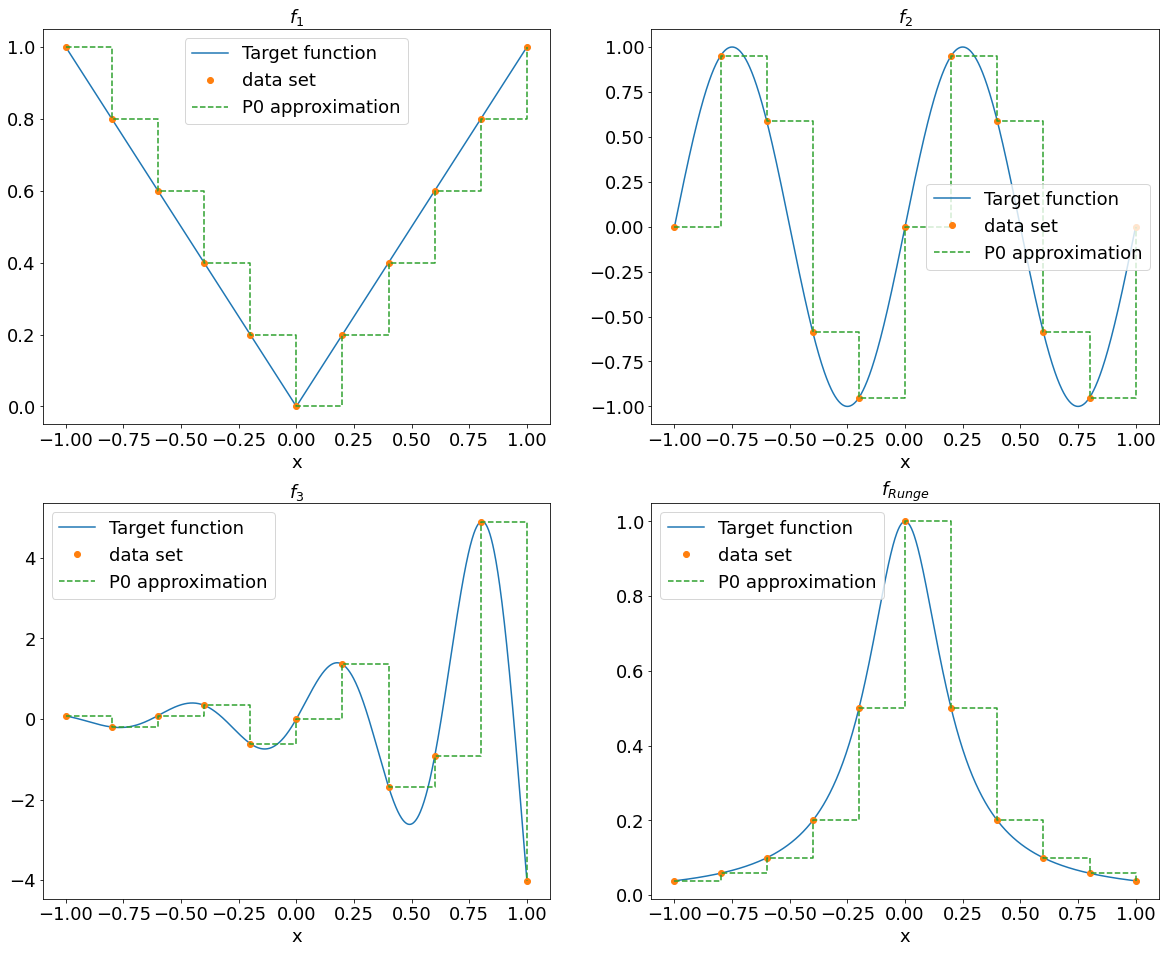

In [22]:
## Plots of several functions together with their P0 approximation
## we use the fact that plt.plot(x,y) plots lines between the points (x[k],y[k])

n = 10
x = np.linspace(-1, 1, n+1) # uniform mesh

# the vector [x0, x1, x1, x2, x2, ... , x{n-1}, xn, xn] used to plot piece-wise constant functions
x_pw = np.zeros(2*n+1)
x_pw[0::2] = x
x_pw[1::2] = x[1:]

# points at which the target functions will be plotted
X = np.linspace(-1, 1, 1001)

fig = plt.figure(figsize = (20,16))

plt.subplot(2,2,1)
y1 = f1(x) 
# create the vector [f(x0), f(x0), f(x1), f(x1), ... , f(x{n-1}), f(x{n-1}), f(x{n})]
y1_pw = np.zeros(2*n+1)
y1_pw[0::2] = y1
y1_pw[1::2] = y1[0:-1]
#plot the function
plt.plot(X, f1(X), label='Target function')
#plot the P0 interpolation
plt.plot(x, y1, marker='o', linestyle='', label = 'data set')
plt.plot(x_pw, y1_pw, '--', label='P0 approximation')
plt.title('$f_1$', fontsize=18)
plt.legend(fontsize=18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)

plt.subplot(2,2,2)
y2 = f2(x) 
# create the vector [f(x0), f(x0), f(x1), f(x1), ... , f(x{n-1}), f(x{n-1}), f(x{n})]
y2_pw = np.zeros(2*n+1)
y2_pw[0::2] = y2
y2_pw[1::2] = y2[0:-1]
#plot the function
plt.plot(X, f2(X), label='Target function')
#plot the P0 interpolation
plt.plot(x, y2, marker='o', linestyle='', label = 'data set')
plt.plot(x_pw, y2_pw, '--', label='P0 approximation')
plt.title('$f_2$', fontsize=18)
plt.legend(fontsize=18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)


plt.subplot(2,2,3)
y3 = f3(x) 
# create the vector [f(x0), f(x0), f(x1), f(x1), ... , f(x{n-1}), f(x{n-1}), f(x{n})]
y3_pw = np.zeros(2*n+1)
y3_pw[0::2] = y3
y3_pw[1::2] = y3[0:-1]
#plot the function
plt.plot(X, f3(X), label='Target function')
#plot the P0 interpolation
plt.plot(x, y3, marker='o', linestyle='', label = 'data set')
plt.plot(x_pw, y3_pw, '--', label='P0 approximation')
plt.title('$f_3$', fontsize=18)
plt.legend(fontsize=18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)

plt.subplot(2,2,4)
yRunge = f_Runge(x) 
# create the vector [f(x0), f(x0), f(x1), f(x1), ... , f(x{n-1}), f(x{n-1}), f(x{n})]
yRunge_pw = np.zeros(2*n+1)
yRunge_pw[0::2] = yRunge
yRunge_pw[1::2] = yRunge[0:-1]
#plot the function
plt.plot(X, f_Runge(X), label='Target function')
#plot the P0 interpolation
plt.plot(x, yRunge, marker='o', linestyle='', label = 'data set')
plt.plot(x_pw, yRunge_pw, '--', label='P0 approximation')
plt.title('$f_{Runge}$', fontsize=18)
plt.legend(fontsize=18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)


plt.show()


<div markdown=1 class="Answer">

It turns out that the observed convergence can be proved under rather mild assumptions on $f$, and that we also get an error estimator.

<div markdown = 1, class = "Thm"> <b> Convergence of $\mathbb{P}^0$ approximation.</b> If $f$ is of class $\mathcal{C}^1$ one has 

$$ \sup_{x \in [a,b]} \lvert \Pi^0 f(x) - f(x) \rvert \leq h \sup_{x\in [a,b]} |f'(x)|.$$

In particular, the global error $\sup_{x \in [a,b]} \lvert \Pi^0 f(x) - f(x) \rvert$ goes to $0$ when $h$ goes to $0$, and $\Pi^0 f(x)$ converges uniformly to $f$ on $[a,b]$.

>**Proof.**
> Let us choose an $x$ in $[a,b]$. Since the point $x$ is in one of the subintervals, there exists an index $k_x$ with $0\leq k_x < n$ such that $x\in [x_{k_x},x_{k_x+1}]$. From the definition of $\Pi^0 f$ we get $\Pi^0 f(x) = f(x_{k_x})$. Then, from the Mean-Value theorem, we have the existence of $\xi_x\in [x_{k_x},x]$ such that
>
>$$
\lvert \Pi^0 f(x) - f(x) \rvert= \lvert f(x_{k_x}) - f(x) \rvert= \lvert (x_{k_x}-x) f'(\xi_x)\rvert \leq h \sup_{x\in [a,b]} |f'(x)|.
$$
>
>This is true for any $x$ in $[a,b]$ and the upper bound does not depend on $x$. As a consequence we obtain the announced result:
>
>$$ \sup_{x \in [a,b]} \lvert \Pi^0 f(x) - f(x) \rvert \leq h \sup_{x\in [a,b]} |f'(x)|.$$

<div markdown = 1, class = "Rmk"> 

- One can show that this error estimator is sharp in general, and that, for most functions satisfying the assumptions of the theorem, the error scales like $h$, or like $\frac{1}{n}$ in the case of a uniform mesh.
- A more classical way to define a piecewise constant function to approximate $f$ is to take the value at the middle of the subintervals. In that case, the approximation is equal to the original function on the $n$ nodes: $\displaystyle \left( \frac{x_k +x_{k+1}}{2}\right)_{k=0..n-1}$ and the previous result of convergence still holds.

### Piecewise affine interpolation: $\mathbb{P}^1$-approximation

The precision of the piecewise approximation can be increased by using affine approximations (that is, polynomials of degree 1 rather than 0) on each subinterval.

<div markdown = 1 class = "Def"> <b> $\mathbb{P}^1$-approximation.</b> Let $f$ be a function defined on $[a,b]$ and a set of $n+1$ mesh points $(x_k)_{0\leq k\leq n}$: $a = x_0 < x_1 < \ldots < x_n = b$. The piecewise linear approximation of $f$ on $[a,b]$, with respect to the mesh points $(x_k)_k$, is the function $\Pi^1 f$ defined on $[a,b]$ by 

- for $0\leq k<n$, $\quad{} \Pi^1 f$ is affine on $[x_k, x_{k+1}[$ 
- for $0\leq k\leq n$, $\quad{} \Pi^1 f(x_k) = f(x_k)$

<div markdown=1 class="DoIt"> Run the following cell to plot the $\mathbb{P}^1$-approximation of the functions $f_1$, $f_2$, $f_3$ and $f_{Runge}$ already studied previously, with a uniform mesh (that is, with equidistant points $x_k$) on $[-1,1]$. How do the results compare with what you obtained with the $\mathbb{P}^0$-approximation?

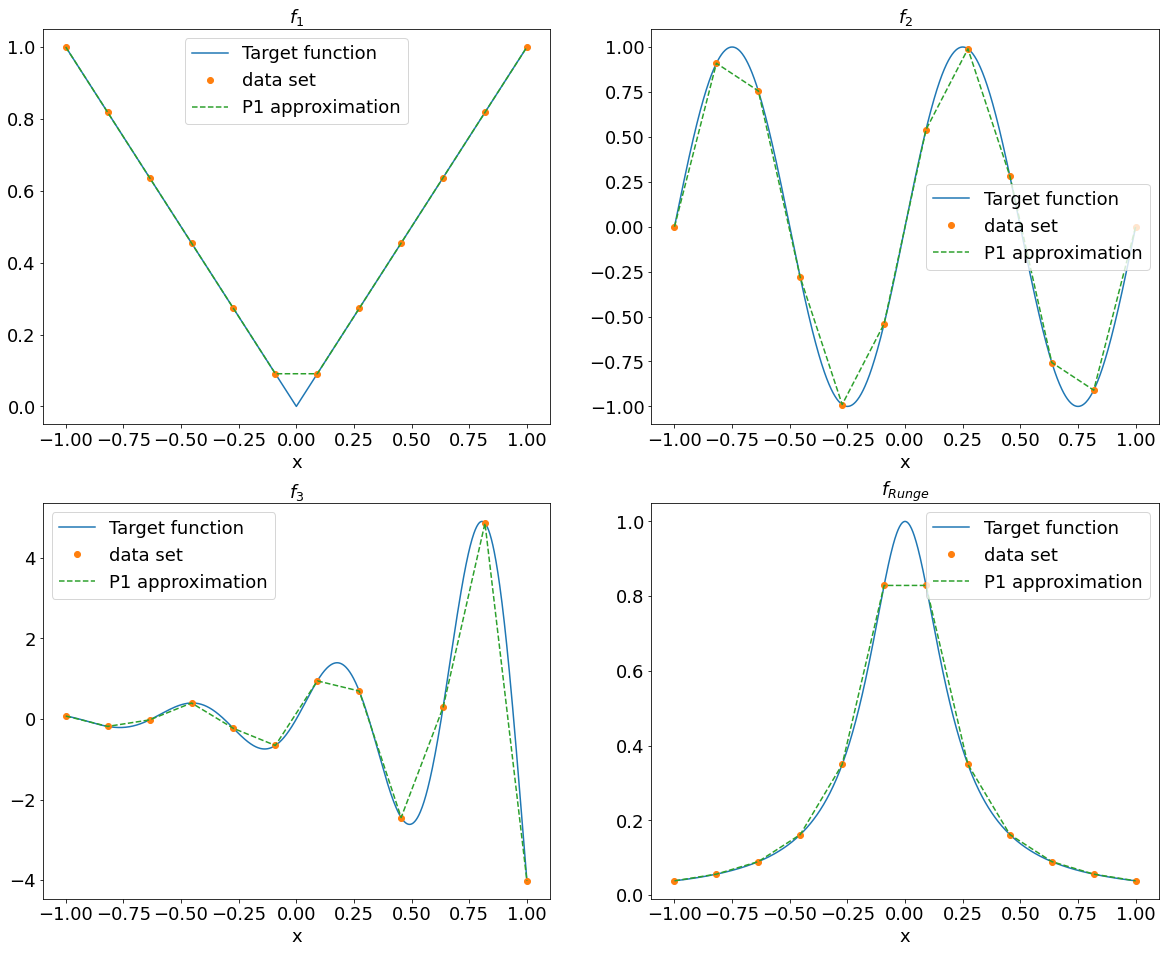

In [23]:
## Plots of several functions together with their P1 approximation

n = 11
x = np.linspace(-1, 1, n+1) # uniform mesh

# points at which the target functions will be plotted
X = np.linspace(-1, 1, 1001)

fig = plt.figure(figsize = (20,16))

plt.subplot(2,2,1)
y1 = f1(x) 
plt.plot(X, f1(X), label='Target function')
plt.plot(x, y1, marker='o', linestyle='', label = 'data set')
plt.plot(x, y1, '--', label='P1 approximation')
plt.title('$f_1$', fontsize=18)
plt.legend(fontsize=18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)

plt.subplot(2,2,2)
y2 = f2(x) 
plt.plot(X, f2(X), label='Target function')
plt.plot(x, y2, marker='o', linestyle='', label = 'data set')
plt.plot(x, y2, '--', label='P1 approximation')
plt.title('$f_2$', fontsize=18)
plt.legend(fontsize=18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)


plt.subplot(2,2,3)
y3 = f3(x) 
plt.plot(X, f3(X), label='Target function')
plt.plot(x, y3, marker='o', linestyle='', label = 'data set')
plt.plot(x, y3, '--', label='P1 approximation')
plt.title('$f_3$', fontsize=18)
plt.legend(fontsize=18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)

plt.subplot(2,2,4)
yRunge = f_Runge(x) 
plt.plot(X, f_Runge(X), label='Target function')
plt.plot(x, yRunge, marker='o', linestyle='', label = 'data set')
plt.plot(x, yRunge, '--', label='P1 approximation')
plt.title('$f_{Runge}$', fontsize=18)
plt.legend(fontsize=18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize = 18)

plt.show()


<div markdown=1 class="Answer">

These observations are validated by the following theorem.

<div markdown = 1, class = "Thm"> <b> Convergence of $\mathbb{P}^1$ approximation.</b> If $f$ is of class $\mathcal{C}^2$ one has 

$$ \sup_{x \in [a,b]} \lvert \Pi^1 f(x) - f(x) \rvert \leq \frac{h^2}{8} \sup_{x\in [a,b]} |f''(x)|.$$

In particular, the global error $\sup_{x \in [a,b]} \lvert \Pi^0 f(x) - f(x) \rvert$ goes to $0$ when $h$ goes to $0$, and $\Pi^0 f(x)$ converges uniformly to $f$ on $[a,b]$.

> **Proof.** [$\star$]
> Let us choose an $x$ in $[a,b]$. Since the point $x$ is in one of the subintervals, there exists an index $k_x$ with $0\leq k_x < n$ such that $x\in [x_{k_x},x_{k_x+1}]$.
> Notice that, on $[x_{k_x},x_{k_x+1}]$, $\Pi^1 f$ is the Lagrange interpolation polynomial interpolating $f$ at the nodes $x_{k_x}$ and $x_{k_x+1}$. Therefore, one can use the error approximation theorem for Lagrange interpolation and get the existence of $\xi_x\in[x_{k_x},x_{k_x+1}]$ such that
>
>$$
f(x) - \Pi^1 f(x) = \frac{(x-x_{k_x})(x-x_{k_x+1})}{2!} f''(\xi_x).
$$
>
>The maximum of $\left\vert (x-x_{k_x})(x-x_{k_x+1}) \right\vert$ on the interval $[x_{k_x},x_{k_x+1}]$ is reached at $(x_{k_x}+x_{k_x+1})/2$ and is equal to $\left( (x_{k_x+1}-x_{k_x})/2 \right)^2 \leq \frac{h^2}{4}$ so that we obtain the following upper-bound:
>
>$$
\lvert \Pi^1 f(x) - f(x) \rvert \leq \frac{h^2}{8} \sup_{x\in [a,b]} |f''(x)|.
$$
>
> This being true for any $x$ in $[a,b]$, the theorem is proved.

<div markdown = 1, class = "Rmk">  

- One can show that this error estimator is sharp in general, and that, for most functions satisfying the assumptions of the theorem, the error scales like $h^2$, or like $\frac{1}{n^2}$ in the case of a uniform mesh. However, this estimation might no longer be valid if the function is not regular enough.
- This approach can be generalized to piecewise approximation with higher degree polynomials. An important example (which is beyond the scope of this course) is the one of **cubic splines**.
- For the $\mathbb{P}^0$ and the $\mathbb{P}^1$ approximation we have found error estimators 
$$
\beta^0_n = \frac{\sup_{x\in [a,b]} |f'(x)|}{n} \quad{}\text{and}\quad{} \beta^1_n = \frac{\sup_{x\in [a,b]} |f''(x)|}{8n^2},$$
for which we have *sublinear* convergence, as introduced in Chapter 1, since in both cases
$$
\frac{\beta_{n+1}}{\beta_n} \underset{n\to\infty}{\longrightarrow} 1.
$$

<a id="LeastSquare"></a>
## Least squares approximation

<table>
        <tr>
            <td><img src="figures/Legendre.jpg" alt="Legendre" style="width: 170px;" /></td>
            <td><img src="figures/Gauss.jpg" alt="Gauss" style="width: 190px;" /></td>
        </tr>
</table>

>**Adrien-Marie Legendre (1752 - 1833) and Carl Friedrich Gauss (1777 - 1855).**
>The method of least squares grew out of the fields of astronomy and geodesy, as scientists and mathematicians sought to provide solutions to the challenges of navigating the Earth's oceans. To do so, the accurate description of the behavior of celestial bodies was the key to enabling ships to sail in open seas, where sailors could no longer rely on land sightings for navigation. A seminal method, called the method of average, was used for example by the French scientist Pierre-Simon Laplace to study the motion of Jupiter and Saturn. The first clear and concise exposition of the method of least squares was published by the French mathematician Adrien-Marie Legendre in 1805 (no portrait known apart from this caricature...). In 1809, the German mathematician Carl Friedrich Gauss published his method of calculating the orbits of celestial bodies. In that work he claimed to have been in possession of the method of least squares since 1795. This naturally led to a priority dispute with Legendre. However, to Gauss's credit, he went beyond Legendre and succeeded in connecting the method of least squares with the principles of probability and to the normal distribution.

Suppose now that you are a case where:
- the dataset $(x_k,y_k)_{k=0..n}$ is big ($n$ is large), and possibly noisy,
- you want to approximate the data with a single, simple model (a polynomial function of low degree).

With the Lagrange interpolation that we have seen previously, the degree of the interpolation polynomial is prescribed by the number of points, and so having a large data set in not compatible with an approximation of low degree. The piece-wise interpolation techniques that we just saw are also not suitable, because they do not satisfy the requirement of having a single model for the whole data.

We present here a method allowing to deal with these problems.

Assume that a dataset $(x_k,y_k)_{k=0..n}$ is given. We want to find a polynomial $Q_m$ with degree at most $m$ to approximate this data, but with $m\ll n$. This means that we will typically not be able to find $Q_m$ such that $Q_m(x_k) = y_k$ for $k=0,\ldots,n$, as there are too many equations ($n+1$) compared to the number of unknown (the $m+1$ coefficients of $Q_m$). Therefore, we have to settle for finding  $Q_m$ such that $Q_m(x_k)$ is "close to" $y_k$ for $k=0,\ldots,n$. 

<div markdown=1 class='Def'>

Here, we consider the **least squares approximation**, which means that $Q_m$ has to be "close to" the data in the following sense: $Q_m$ is a polynomial of degree at most $m$ minimizing the following functional $J$ among all the polynomials $Q$ of degree at most $m$

$$
J(Q) = \sum_{k=0}^n (Q(x_k) - y_k)^2.
$$

<div markdown = 1, class = "Rmk"> 

- Note that, since all the terms of this sum are positive, $J(Q)=0$ implies that for all $k$, $J(x_k)=0$ and that $Q$ interpolates the data. If $m<n$, such a $Q$ does usually not exist.
- If $J(Q)$ is "small", say smaller than a given small parameter $\varepsilon$, then for all $k$, $\lvert Q(x_k)-y_k\rvert\leq \sqrt{\varepsilon}$.

In that sense, $J(Q)$ measures how $Q$ is close to the data. Other choices for $J$ are possible. The least squares choice provides a convex function $J$ for which the existence and uniqueness of the minimizer can be proved.


### Constant approximation

Assume that the dataset $(x_k,y_k)_{k=0..n}$ is given and you want to find a constant polynomial $Q(x)=a$ such that $Q$ minimizes $J$ over the set of constant polynomials.

The unknown is the coefficient $a$, and the problem comes back to finding the constant $a^*$ minimizing the functional

$$
J(a) = \sum_{k=0}^n (Q(x_k) - y_k)^2 = \sum_{k=0}^n (a - y_k)^2.
$$

<div markdown=1, class='Prop'> There exists a unique coefficient $a^*$ which minimizes this functional,  given by 

$$
a^* = \frac{1}{n} \sum_{k=0}^n y_k.
$$

>**Proof.** In that case, the function $a \rightarrow J(a)$ is a polynomial of degree 2 with a positive leading coefficient, which implies that there exists a unique $a^*$ minimizing $J$ and that $a^*$ is solution to 
>
>$$
J'(a^*) = 0.
$$
>
>This gives 
>
>$$
\sum_{k=0}^n 2 (a^* - y_k) = 0,
$$
>
>and finally $a^*$ is the mean value of the data:
>
>$$
a^* = \frac{1}{n} \sum_{k=0}^n y_k.
$$

### Linear regression

Assume that the dataset $(x_k,y_k)_{k=0..n}$ is given and you now want to find a linear polynomial $Q(x)=ax$ such that $Q$ minimizes $J$ over the set of linear polynomials.

Again, the unknown is the coefficient $a$ and the problem comes back to finding the constant $a^*$ minimizing the functional

$$
J(a) = \sum_{k=0}^n (Q(x_k) - y_k)^2 = \sum_{k=0}^n (a\,x_k - y_k)^2.
$$




<div markdown=1, class='Prop'> Assume that not all the $x_k$ are equal to $0$. There exists a unique coefficient $a^*$ which minimize this functional, given by 

$$
 a^* = \frac{\displaystyle\sum_{k=0}^n x_k \, y_k}{\displaystyle\sum_{k=0}^n x_k^2}.
$$

>**Proof.** The function $a \rightarrow J(a)$ is again a polynomial of order 2 with a positive dominant coefficient, which implies that there exists a unique $a^*$ minimizing $J$ and that $a^*$ is solution to 
>
>$$
J'(a^*) = 0.
$$
>
>This gives 
>
>$$
\sum_{k=0}^n 2 (a^* x_k - y_k)\, x_k = 0,
$$
>
>which provides an explicit formula for $a^*$ in terms of the data:
>
>$$
 a^* = \frac{\displaystyle\sum_{k=0}^n x_k \, y_k}{\displaystyle\sum_{k=0}^n x_k^2}.
$$

<div markdown=1 class="DoIt"> Complete the following function computing the coefficient $a^*$ of a linear regression from a given dataset $(x_k,y_k)_{k=0..n}$. Take care not to use any loop.

In [24]:
## Computation of parameters astar for a linear model, using least squares 
## input : x = vector containing the nodes x0...xn
##         y = vector containing the values y0...yn
## output : astar = approximation of a

def LinearReg(x,y):
    """
    Computation of the parameter a* of a linear model, using least squares 
    ----------------------------------------
    Inputs: 
    x : vector containing the nodes x0...xn
    y : vector containing the values y0...yn
    
    Output: 
    astar : approximation of the linear coefficient
    """
    return np.sum(x*y)/np.sum(x*x)

<div markdown=1 class="DoIt"> Run the following cell to test the linear regression for linear data of slope $a$ with noise. What is the approximated value of $a$ computed using this method? Compare with the exact value.

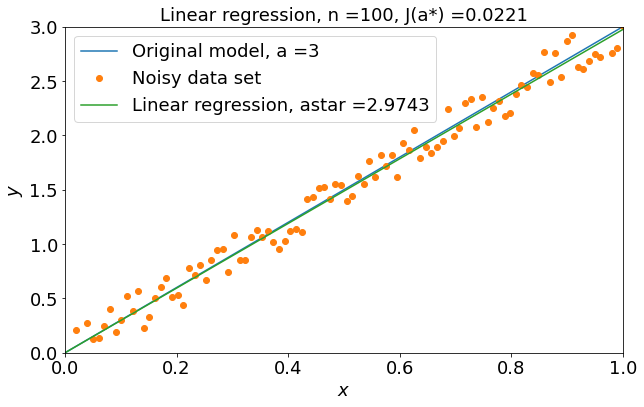

In [25]:
# size of the dataset
n = 100

# original model : f(x) = ax
a = 3
x = np.linspace(0, 1, n)
y = a*x

# compute the data : add noise to the original model
noiseSize = 0.2
noise = ( 2*np.random.rand(x.size) - 1 ) * noiseSize  # uniform in [-noiseSize,noiseSize]
data = y + noise

# compute the linear regression
astar = LinearReg(x,data)

# approximated model
ystar = astar*x

# computation of the value of J(astar,bstar)
J = np.sum( (ystar - y)**2 )

#plot
plt.figure(figsize = (10,6))
plt.plot(x, y, label='Original model, a ='+str(a))
plt.plot(x, data,marker='o', linestyle='', label='Noisy data set')
plt.plot(x, ystar, label='Linear regression, astar ='+str(round(astar,4)))
plt.xlim(0,1)
plt.ylim(0,a)
plt.xlabel('$x$', fontsize = 18)
plt.ylabel('$y$', fontsize = 18)
plt.tick_params(labelsize = 18)
plt.legend(fontsize = 18)
plt.title('Linear regression, n ='+str(n)+', J(a*) ='+str(round(J,4)), fontsize = 18)
plt.show()


### Affine regression

Assume that the dataset $(x_k,y_k)_{k=0..n}$ is given and you now want to find an affine polynomial $Q(x)=ax+b$ such that $Q$ minimizes $J$ over the set of affine polynomials.

In that case, there are two unknown coefficients $a$ and $b$. The problem comes back to finding the constants $(a^*,b^*)$ minimizing the functional

$$
J(a,b) = \sum_{k=0}^n (Q(x_k) - y_k)^2 = \sum_{k=0}^n (ax_k + b - y_k)^2.
$$




<div markdown=1, class='Prop'> Assume that not all the $x_k$ are equal. There exists a unique couple of coefficients $(a^*,b^*)$ which minimize this functional, given by 

$$
a^* = \cfrac{\overline{xy} - \bar{x} \bar{y}}{\overline{x^2} - \bar{x}^2} \qquad{}\text{and}\qquad{} b^* =  \bar{y}-a^*\,\bar{x},
$$

where 

$$
\bar{x} = \frac{1}{n+1}\sum_{k=0}^n x_k,\quad{} \bar{y} = \frac{1}{n+1}\sum_{k=0}^n y_k,\quad{} \overline{xy} = \frac{1}{n+1}\sum_{k=0}^n x_k y_k \quad{}\text{and}\quad{} \overline{x^2} = \frac{1}{n+1}\sum_{k=0}^n x^2_k.
$$

>**Proof**. [$\star$] We want to find $(a^*,b^*)$ such that
>
>$$
\forall a,b\quad{} J(a^*,b^*)\leq J(a,b).
$$
>
> For any $(a^*,b^*)$, we can write
>
>$$
J(a,b) = \sum_{k=0}^n (a^*x_k + b^* - y_k + (a-a^*)x_k + (b-b^*) )^2,
$$
>
>and expand this expression to get
>
>\begin{align}
J(a,b) & = \sum_{k=0}^n (a^*x_k + b^* - y_k)^2  \nonumber\\ 
&\quad{} + \sum_{k=0}^n 2(a^*x_k + b^* - y_k)((a-a^*)x_k + (b-b^*)) + \sum_{k=0}^n ((a-a^*)x_k + (b-b^*))^2  \\
& = J(a^*,b^*) \nonumber\\
&\quad{} + \left(2\sum_{k=0}^n (a^*x_k^2 + b^*x_k - x_ky_k)\right) (a-a^*) + \left(2\sum_{k=0}^n (a^*x_k + b^* - y_k)\right) (b-b^*) \nonumber\\
&\quad{} + \sum_{k=0}^n ((a-a^*)x_k + (b-b^*))^2.
\end{align}
>
>Let us now assume that $a^*$ and $b^*$ are such that $\sum_{k=0}^n (a^*x_k^2 + b^*x_k - x_ky_k)\neq 0$. Then, taking $b=b^*$ and $a$ close to $a^*$, we have
>
>$$
J(a,b^*) = J(a^*,b^*) + \left(2\sum_{k=0}^n (a^*x_k^2 + b^*x_k - x_ky_k)\right) (a-a^*) + o(a-a^*),
$$
>
>and we see that $J(a^*,b^*)$ cannot be the minimum of $J$: taking $a$ a bit below $a^*$ (or a bit above, depending on the sign of $\sum_{k=0}^n (a^*x_k^2 + b^*x_k - x_ky_k)$), we would get that $J(a,b^*)$ is smaller than $J(a^*,b^*)$. Similarly, if $\sum_{k=0}^n (a^*x_k + b^* - y_k) \neq 0$, we see by taking $a=a^*$ and $b$ close to $b^*$ that $J(a^*,b^*)$ cannot be the minimum of $J$. 
> 
> We have just shown that, if $J$ reaches its minimum at $(a^*,b^*)$, then we must have
>
>$$
\left\{
\begin{aligned}
&\sum_{k=0}^n (a^*x_k^2 + b^*x_k - x_ky_k) & =  0 \\
&\sum_{k=0}^n (a^*x_k + b^* - y_k) & = 0
\end{aligned}
\right.
$$
>
>Conversely, if these two conditions are met, then from the expansion obtained just above we get
>
>$$
J(a,b) = J(a^*,b^*) + \sum_{k=0}^n ((a-a^*)x_k + (b-b^*))^2,
$$
>
>and since the last term is nonnegative we indeed have $J(a^*,b^*)\leq J(a,b)$ for all $a$ and $b$. We have thus found two necessary and sufficient conditions for $(a^*,b^*)$ to be a minimizer of $J$. *(Once you will have learned about optimizing functions of several variables, you'll be able to do the above part of the proof in two lines.)* Next, notice that these two conditions can be rewritten as
>
>$$
\left\{
\begin{aligned}
 &\left(\sum_{k=0}^n x_k^2\right) a^*  + \left(\sum_{k=0}^n x_k\right) b^* =  \sum_{k=0}^n x_ky_k \\
 &\left(\sum_{k=0}^n x_k\right) a^*  + (n+1) b^* =  \sum_{k=0}^n y_k
\end{aligned}
\right.
$$
>
>That is, we want $(a^*,b^*)$ to solve the linear system
>
>$$
M \left(\begin{array}{l} a^* \\ b^* \end{array} \right) = V \quad{} \text{where}\quad{} M = \left(\begin{array}{ll}
\displaystyle \sum_{k=0}^n x_k^2 &\displaystyle  \sum_{k=0}^n x_k \\
\displaystyle \sum_{k=0}^n x_k   &\displaystyle  (n+1)         
\end{array}\right) \quad{} \text{and}\quad{}
V = \left(\begin{array}{l} \displaystyle\sum_{k=0}^n x_k y_k \\ \displaystyle\sum_{k=0}^n y_k \end{array} \right).
$$
>
>The determinant of $M$ is equal to $(n+1)\sum_{k=0}^n x_k^2 - \left(\sum_{k=0}^n x_k\right)^2$. However, by the Cauchy-Schwarz inequality
>
>$$
\left(\sum_{k=0}^n x_k\right)^2 = \left(\sum_{k=0}^n x_k \times 1 \right)^2 \leq \left(\sum_{k=0}^n x_k^2  \right) \left(\sum_{k=0}^n 1^2  \right) = (n+1) \sum_{k=0}^n x_k^2,
$$
with equality only if all the $x_k$ are equal, which is excluded by the assumption. Therefore the determinant of $M$ is positive and $M$ is invertible. Hence, the solution $(a^*,b^*)$ of this linear system is unique, and by solving it we find the announced formula.

<div markdown=1 class="DoIt"> Complete the following function computing the coefficients $(a^*,b^*)$ of an affine regression for a given dataset $(x_k,y_k)_{k=0..n}$. Take care not to use any loop.

In [26]:
def AffineReg(x,y): 
    """
    Computation of parameters a* and b* of an affine model, using least squares 
    ----------------------------------------
    Inputs: 
    x : vector containing the nodes x0...xn
    y : vector containing the values y0...yn
    
    Output: 
    astar, bstar : the coefficients of the model (astar * x + bstar)
    """
    ...
    ...
    return ...

<div markdown=1 class="DoIt"> Complete the following cell to test the affine regression for affine data of the form $ax+b$ with noise. What are the approximated values of $(a,b)$ computed using this method? Compare with the exact values.

In [27]:
# size of the dataset
n = 100

# original model : f(x) = ax +b
a = 3
b = 2
x = np.linspace(0,1,n)
y = a*x + b

# compute the data : add noise to the original model
...

# compute the affine regression
astar, bstar = ...

# approximated model
ystar = astar*x + bstar

# computation of the value of J(astar,bstar)
J = ...

#plot
...

TypeError: cannot unpack non-iterable ellipsis object

<div markdown = 1, class = "Rmk"> 

- The generic case is to find an approximation of degree $m$, which leads to the minimization of the functional
$$
J(a_0,a_1,\ldots, a_m) = \sum_{k=0}^n (a_0 + a_1 x_k + \ldots + a_m x_k^m - y_k)^2
$$
The necessary and sufficient conditions for having a minimum for such a functional, which are given by $\nabla J(a_0^*,a_1^*,\ldots, a_m^*) = 0$, give rise to a linear system for the optimal coefficients $a_0^*,a_1^*,\ldots, a_m^*$.
- This problem, namely finding a least square polynomial approximation of degree $m$, is exactly the one that is solved by the function `numpy.polyfit`, which we have already used previously.

<div markdown=1 class="DoIt">

Check that your function `AffineReg` gives approximately the same output as `np.polyfit` with degree $1$.

## Back to the case studies [$\star$]

### Case study 1: a solution using Lagrange interpolation

First, recall that we want to model the evolution of the world population, using the data set given in the introduction. The first objective is to estimate the population at year 1951, the second one is to determinate the year for which the population was equal to 2.2 billions. Here is the available data. 

In [ ]:
yearsData = np.array([1900., 1927., 1955., 1960.])
popData = np.array([1.6, 2, 2.772242535, 3.033212527])

plt.figure(figsize=(10,6))
plt.plot(yearsData, popData, linestyle='', marker="o")
plt.title('Evolution of the world population from 1900 to 1960', fontsize = 18)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Billions', fontsize = 18)
plt.tick_params(labelsize = 18)
plt.show()

We want to approximate the population using a polynomial $P$. To evaluate the population in 1951, we will just have to evaluate the polynomial $P$ at $x = 1951$. To determine the year at which the population was equal to $2.2$ billions, we can use the root-finding methods studied in the previous cycle to find the zero of $P(x) - 2.2$. 

To compute a polynomial approximating the data, we use the Lagrange polynomial approximation.

<div markdown=1 class="DoIt"> Compute and plot the Lagrange polynomial interpolation of the data based on years 1900, 1927, 1955 and 1960. Plot the data on the same figure.

<div markdown=1 class="DoIt"> Use this Lagrange polynomial $P$ to estimate the population at year 1951. Compare to the true value 2,583,816,786.

We now want to use this Lagrange polynomial $P$ to estimate the year at which the population was equal to $2.2$ billions. To do so, we use the bisection method that we implemented in the previous cycle to find a root of the function $f(x) = P(x)-2.2$ 

<div markdown=1 class="DoIt"> Create a cell with a a function containing the bisection algorithm (you can copy/paste what you did in the previous cycle), and a second cell where you use the bisection algorithm to estimate when the world population crossed $2.2$ billions.

### Case study 2: a solution using piecewise polynomial interpolation

Recall we want to compute 

$$\pi=4\int_{0}^{1}d_{atan}(x)dx $$

where 

$$ d_{atan}:
\left\{\begin{array}{l}
                           \mathbb{R} &\rightarrow &\mathbb{R} \\
                            x &\rightarrow &\frac{1}{1+x^2}
                            \end{array}\right.
$$

To do so, we compute a an approximation of $d_{atan}$, and approximate the original integral by the integral of the approximation.

<div markdown=1 class="DoIt"> 

Use an approximation of $d_{atan}$ of your choice to estimate the above integral, and therefore $\pi$. Explain how you can compute the integral of the approximation that you choose.
*You can for instance use a Lagrange polynomial interpolation of high degree, or a piece-wise approximation of low degree on a mesh with small mesh-size $h$.*

<div markdown=1 class="Answer">

### Case study 3: parameter estimation for the CAPM using least squares approximation

Recall that, being given the values of the market return $(R^m_k)_{k=0..n-1}$ and an asset return $(R_k)_{k=0..n-1}$ for $n$ days, one wants to estimate the parameters $\alpha$ and $\beta$ in order to model the behaviour of the corresponding asset as

$$
R_k = \alpha + \beta \, R^m_k.
$$

We use the least square approximation method to estimate these parameters for the data set $(x_k,y_k)_{k=0..n-1}=(R_k^m,R_k)_{k=0..n-1}$

#### Data description
The file Data_market.csv records the CAC 40 index and other assets returns from January 2015 to December 2015. The CAC 40 is a benchmark French stock market index and represents the variation of the whole market.

Data used come from https://www.abcbourse.com/download/historiques.aspx .

The data contains the daily asset return for the companies of the CAC40. A column corresponds to a given company and a row to a given day. The market return can be found in the last column. 

The data set can be explored using pandas python library designed to manage data sets. For example, a column can be extracted from the data set using its name, given in the first row of the column.

We focus on the asset "Société Générale", referenced as "Societe.Generale" in the dataset. 

<div markdown=1 class="DoIt">  Run the following cell to observe the data set.

In [ ]:
## Load data 
import pandas as pd              # package for managing datasets

Namefile = "Data_market.csv"
Data = pd.read_csv(Namefile,sep=",")
Data.drop(['Unnamed: 0'],axis=1,inplace=True)

print(Data.head())

#### Affine regression

<div markdown=1 class="DoIt">  Complete the following cell. Use affine regression to estimate the parameters $(\alpha,\beta)$ of the CAPM model for the Societé Générale asset.

In [ ]:
## Set parameters
asset_name = 'Societe.Generale' #The asset
market_index_name = 'Rnd.Market.Index' # Represents Rk^m
marketReturn = Data[market_index_name] # The market return for each k: x_k
assetReturn = Data[asset_name] # The asset return at day k: y_k

## Compute alpha and beta
beta_star, alpha_star = ...

## plot the results
fitted_values = alpha_star + beta_star * marketReturn # Affine model for the asset return
error_vect = assetReturn - fitted_values
error = ...

plt.figure(figsize = (10,6))
plt.plot(marketReturn, fitted_values, label= 'Affine regression')
plt.plot(marketReturn, assetReturn, marker='o', linestyle='', label='data set')
plt.legend(fontsize = 18)
plt.title(r'Société Générale, $(\alpha,\beta)$ =('+str(round(alpha_star,4))+','+str(round(beta_star,4))+'), error is ='+str(round(error,4)), fontsize = 18)
plt.grid()
plt.xlabel('Market return', fontsize=18)
plt.ylabel('Asset return', fontsize=18)
plt.tick_params(labelsize = 18)
plt.show()

#### Linear regression

We saw in the previous estimations that the risk $\alpha$ was very small (it is the the intercept of the previous curve with the $y$-axis). This encourages us to simplify the CAPM model in a linear model:

$$
R_k = \beta \, R^m_k.
$$

and estimate only one parameter $\beta$ using linear regression.

<div markdown=1 class="DoIt"> Complete the following cell. Use linear regression to estimate the parameters $\beta$ of the new linear CAPM model for the Societé Générale asset. Compare the results with the one you obtained using affine regression.

In [ ]:
## Set parameters
asset_name = 'Societe.Generale'
market_index_name = 'Rnd.Market.Index'
y = Data[asset_name]
x = Data[market_index_name]

## Compute alpha and beta
beta_star = ...

## Plot the result
fitted_values = ...
error = ...

plt.figure(figsize = (10,6))
...

#### Security market line

Consider the linear model and suppose you computed $\beta^*$ and you want to know how confident you can be using this value to model the behaviour of the asset.





For any array $x$, we let $ \text{E}(x) = \frac{\sum_{k} x_k}{n}$ be the average value. If $R^m = (R_k^m)_{k=0..n-1}$ is the vector of return values of the market at each day $k$, then $E(R^m)$ is the average return value of the market over $n$ days. Similarly, for a given asset in the portfolio, $\text{E}(R)$ is its average return over the same period. 

Using linear regression, we have found a linear model with parameter $\beta^*$ to approximate the return of the asset from the market return:

$$
R_k \approx \beta^* R^m_k \qquad{} k=0,\ldots,n-1.
$$

Using this model, we get that 

$$
\text{E}(R) \approx \beta^*\, \text{E}(R^m),
$$

and we can then compare this approximation $\beta^*\, \text{E}(R^m)$ given by the model to the exact value $\text{E}(R)$ computed from the data.

- If $\text{E}(R) >  \beta^*\, \text{E}(R^m)$, the model under-estimates the return of the asset
- If $\text{E}(R) =  \beta^*\, \text{E}(R^m)$, the model is a good model for the asset
- If $\text{E}(R) <  \beta^*\, \text{E}(R^m)$, the model over-estimates the return of the asset

This can be observed graphically using the "Security Market line" (SML) defined by

$$
(SML) \; : \;  \beta \mapsto \beta\, \text{E}(R^m).
$$

For a given asset in the portfolio, if the point $(\beta^*, E(R))$ is above (resp. below) the line, it is under-estimated (resp. over-estimated) by the model.

This is what is done below with the different assets of the CAC40 dataset.

In [ ]:
## Compute the data needed for the security market line
def Security_market_line(Data): 
    assets_name = list(Data)[1:-1]
    size = len(assets_name)
    x = Data[market_index_name] # the values R^m_k, k=0,...,n-1
    Res = pd.DataFrame(np.zeros((size,3)), columns=['beta','Fit.val','Average.val'])
    for asset_index in range(size): # asset_index = 0
        asset_name = assets_name[asset_index]
        y = Data[asset_name] # the values R_k, k=0,...,n-1, for the asset undere consideration
        beta_star = LinearReg(x,y)
        Res['beta'][asset_index] = beta_star # the estimated value of beta for this asset
        Res['Fit.val'][asset_index] = beta_star*np.mean(x) # the corresponding approximation beta*E(R^m) of the average return of the asset
        Res['Average.val'][asset_index] = np.mean(y) # the actual average return of the asset
    assets_name = pd.DataFrame(assets_name, columns = ['Name'])
    Res = pd.concat([assets_name,Res],axis=1)
    return Res

<div markdown=1 class="DoIt">  Run the following cell to observe the over and under estimated companies for the linear regression CAPM model.

In [ ]:
## Plot 
Res = Security_market_line(Data)
print(Res)
plt.figure(figsize = (16,8))
plt.plot(Res['beta'], Res['Average.val'], marker='o', linestyle='', label='data set')
plt.plot(Res['beta'], Res['Fit.val'], linewidth=5, label='Security Market line')
size = Res.shape[0]
for index in range(size): ## write names of assets
    name = Res['Name'][index].split('.')[0]
    x = Res['beta'][index]
    y = Res['Average.val'][index]
    plt.annotate(name, (x,y), fontsize=18)
plt.text(0.6,0.0012,"undervalued assets", fontsize=22, color='r')
plt.text(1.07,-0.0003,"overvalued assets", fontsize=22, color='r')
plt.legend(fontsize = 15)
plt.title('Checking the model against the data', fontsize = 18)
plt.xlabel(r'$\beta$', fontsize=18)
plt.ylabel('Average return', fontsize=18)
plt.tick_params(labelsize = 18)
plt.grid()
plt.show() 

In [ ]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()